# Accounting Exploratory Data Analysis (EDA)

In [1]:
# Standard imports, along with `plotter_funcs` and `bootstrap_funcs`, which are custom defined functions that will help with some of our EDA later.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
from plotter_funcs import *
from bootstrap_funcs import *
%matplotlib inline
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)
us_accounting = pd.read_csv('./us_accounting_clean.csv')

In [2]:
us_accounting.dtypes

Exit Status                  object
Has CPA                      object
Years Experience            float64
Current Salary + Bonus      float64
Years Public Before Exit    float64
Current Industry             object
What COL is your region?     object
Gender                       object
Line of Service              object
Average Hours Per Week      float64
dtype: object

We have four quantitative fields.  We'll begin our analysis there.

## Getting familiar with our qualitative data
* Years Experience
* Current Salary + Bonus
* Years Public Before Exit
* Average Hours Per Week

In [3]:
us_accounting.describe()

,Years Experience,Current Salary + Bonus,Years Public Before Exit,Average Hours Per Week
count,1196.000000,1196.000000,216.000000,648.000000
mean,4.149933,85394.138378,3.551542,45.453901
std,3.285605,47304.234455,2.762246,6.779075
min,0.200000,8400.000000,0.000000,16.000000
25%,2.000000,60000.000000,2.000000,40.000000
50%,3.000000,72000.000000,3.000000,45.000000
75%,5.000000,95000.000000,4.000000,50.000000
max,30.000000,750000.000000,27.000000,80.000000


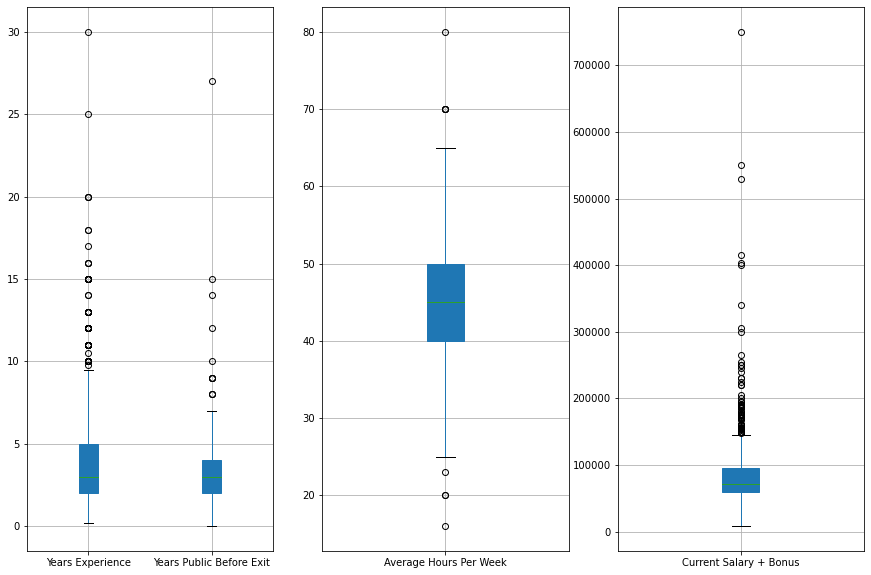

In [4]:
fig, ax = plt.subplots(1,3, figsize=(15,10))

boxplot1 = us_accounting.boxplot(column=['Years Experience', 'Years Public Before Exit'], ax=ax[0], patch_artist=True, return_type='both')
boxplot2 = us_accounting.boxplot(column='Average Hours Per Week', ax=ax[1], patch_artist=True, return_type='both')
boxplot3 = us_accounting.boxplot(column='Current Salary + Bonus', ax=ax[2], patch_artist=True, return_type='both')
#ax[2].set_yticks(np.arange(0, 800_001, 50_000))
# for row_key, (ax, row) in boxplot1.iteritems():
#     for i,box in enumerate(row['boxes']):
#         box.set_facecolor(test[i])

# for row_key, (ax, row) in boxplot2.iteritems():
#     for i,box in enumerate(row['boxes']):
#         box.set_facecolor('teal')
        
# for row_key, (ax, row) in boxplot3.iteritems():
#     for i,box in enumerate(row['boxes']):
#         box.set_facecolor('orchid')
        
plt.show();

**From the descriptive statistics and the boxplots above, most US Accountants:**
* **Have between 0 and 9 years experience.**
* **Have worked between 0 and 7 years in a public accounting firm before exiting.**
* **Work an average of between 25 and 65 hours per week.**
* **Earn between 8,400 and 140,000 annually.**

**The middle 50% of US Accountants:**
* **Have between 2 and 4 years experience.**
* **Have worked between 2and 4 years in a public accounting firm before exiting.**
* **Work an Average of 40-50 hours per week.**
* **Earn between 60,000 and 95,000 annually.**

Note: Analysis on Years Experience and Current Salary + Bonus covers all 1196 accountants in survey.  Years public before exit is only 216 accountants and Average Hours per week is 648.

It would be good to get a sense for what the 'typical' US accountant is like for each of these quantitative fields.  We'll do so with confidence intervals.

## Confidence Intervals using the bootstrap method to simulate a population

#### Confidence interval for true population mean/median `Current Salary + Bonus` for US accountants

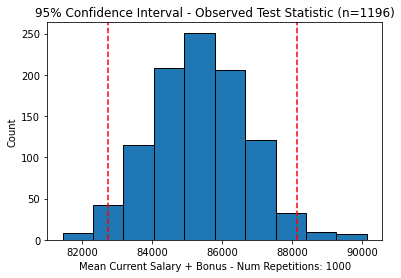

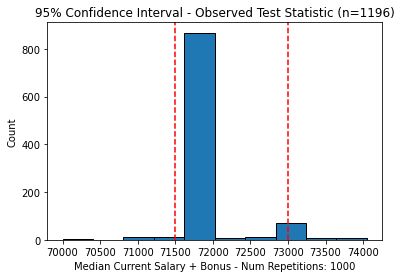


With 95% Confidence, the true population mean Salary + Bonus for US Accountants is between $82,748.02 and $88,145.30.

With 95% Confidence, the true population median Salary + Bonus for US Accountants is between $71,500.00 and $73,000.00.


In [5]:
us_mean_salary = us_accounting['Current Salary + Bonus'].mean()
us_median_salary = us_accounting['Current Salary + Bonus'].median()
sample_size = len(us_accounting['Current Salary + Bonus'])
mean_sal_left, mean_sal_right = get_conf_int(us_accounting, 'Current Salary + Bonus', 1000, 'mean', plot=True)
med_sal_left, med_sal_right = get_conf_int(us_accounting, 'Current Salary + Bonus', 1000, 'median', plot=True)
print()
print('With 95% Confidence, the true population mean Salary + Bonus for US Accountants is between ${:,.2f} and ${:,.2f}.'.format(mean_sal_left, mean_sal_right))
print()
print('With 95% Confidence, the true population median Salary + Bonus for US Accountants is between ${:,.2f} and ${:,.2f}.'.format(med_sal_left, med_sal_right))

Not a bad salary for the typical accountant.  It looks reasonable one could earn at least 70k per year, if not as much as 80-90k, depending on whether you consider the mean or median the best measure of typical here.

### Confidence interval for the true population mean/median `'Years Experience'` for US accountants

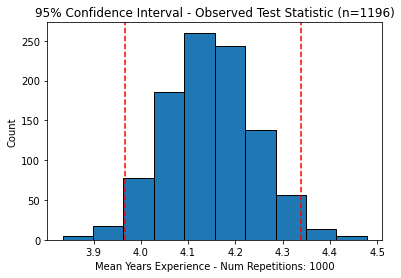

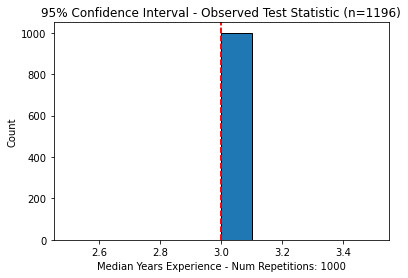


With 95% confidence, the true population mean Years Experience is between 4.0 and 4.3 years.

With 95% confidence, the true population median Years Experience is between 3.0 and 3.0 years.


In [6]:
mean_yrs_exp_left, mean_yrs_exp_right = get_conf_int(us_accounting, 'Years Experience', 1000, 'mean', plot=True)
median_yrs_exp_left, median_yrs_exp_right = get_conf_int(us_accounting, 'Years Experience', 1000, 'median', plot=True)
print()
print('With 95% confidence, the true population mean Years Experience is between {:.1f} and {:.1f} years.'.format(mean_yrs_exp_left, mean_yrs_exp_right))
print()
print('With 95% confidence, the true population median Years Experience is between {:.1f} and {:.1f} years.'.format(median_yrs_exp_left, median_yrs_exp_right))

The typical accountant has roughly 3 or 4 years of experience in the field.

### Confidence interval for the true population mean/median `'Years Public Before Exit'`

Note: The next category `Years Public Before Exit`, has a sample size of 216 because of the way the accounting world is structued.  

Typically, an entry level accountant either begins work in a public accounting firm, who does tax and auditing for their clients in the private sector, or they begin working directly as an accountant for a private firm, performing tasks like accounts payable/receivable, or other accounting related tasks, needed by that company.
    
Because many accountants may start their career at a private firm, the field `Years Public Before Exit` would not apply to them because they've never worked at a pulic firm to then have left.  For this reason, we only have a sample of 216 for the `Years Public Before Exit` field as opposed to the full 1196 respondents in the survey.

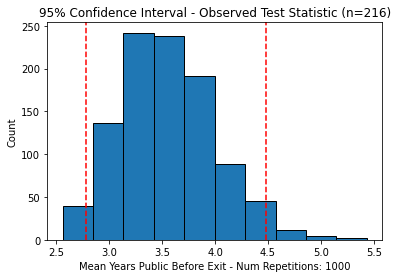

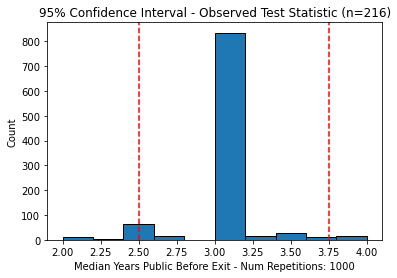


With 95% confidence, the true population mean years in a public accounting firm before exiting is between 2.8 and 4.5 years.

With 95% confidence, the true population median Years in a public accounting firm before exiting is between 2.5 and 3.8 years.


In [7]:
mean_yrs_b4_left, mean_yrs_b4_right = get_conf_int(us_accounting, 'Years Public Before Exit', 1000, 'mean', plot=True)
median_yrs_b4_left, median_yrs_b4_right = get_conf_int(us_accounting, 'Years Public Before Exit', 1000, 'median', plot=True)
print()
print('With 95% confidence, the true population mean years in a public accounting firm before exiting is between {:.1f} and {:.1f} years.'.format(mean_yrs_b4_left, mean_yrs_b4_right))
print()
print('With 95% confidence, the true population median Years in a public accounting firm before exiting is between {:.1f} and {:.1f} years.'.format(median_yrs_b4_left, median_yrs_b4_right))

The typical accountant, who worked in a public accounting firm and then exited to a private industrial firm, has spent roughly 3-5 years in a public accounting firm before exiting.

### Confidence interval for the true population mean/median `'Average Hours Per Week'`
Note: For some reason, many respondents to the survey declined to answer what their average hours worked per week was and we only have a sample of 648 for this field.

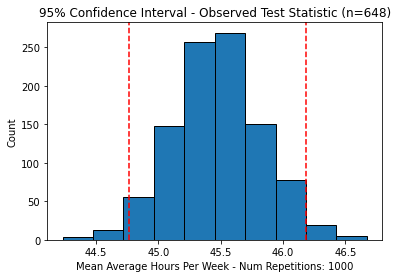

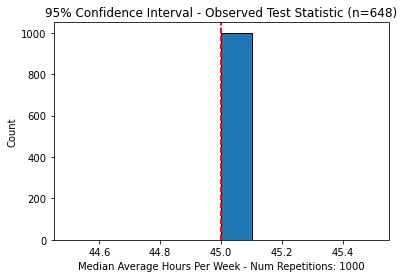


With 95% confidence, the true population mean average hours worked per week is between 44.8 and 46.2 hours.

With 95% confidence, the true population median average hours worked per week is between 45.0 and 45.0 hours.


In [8]:
mean_avg_hrs_left, mean_avg_hrs_right = get_conf_int(us_accounting, 'Average Hours Per Week', 1000, 'mean', plot=True)
median_avg_hrs_left, median_avg_hrs_right = get_conf_int(us_accounting, 'Average Hours Per Week', 1000, 'median', plot=True)
print()
print('With 95% confidence, the true population mean average hours worked per week is between {:.1f} and {:.1f} hours.'.format(mean_avg_hrs_left, mean_avg_hrs_right))
print()
print('With 95% confidence, the true population median average hours worked per week is between {:.1f} and {:.1f} hours.'.format(median_avg_hrs_left, median_avg_hrs_right))

The typical accountant works about 45 or 46 hours per week on average.

**In sum, the typical US accountant:**
* **Has mean earnings between 83,000 and 89,000 annually or median earnings of roughly 72,000-73,000**
* **Has between 3-4 years of experience.**
* **If the accountant worked in Public accounting and has exited, they have spent between 3-5 years before doing so**
* **Works 45-46 hours per week**

Let's start drilling down on our quantitative data by segmenting based on our qualitative fields.

# `Current Salary + Bonus`

## Exploring by `'Gender'`

In [9]:
print("Proportion of survey respondents by gender")
print('-'*60)
print((us_accounting['Gender'].value_counts(normalize=True)).to_string())
print()
males_and_females = us_accounting[us_accounting['Gender'] != 'Undisclosed']

Proportion of survey respondents by gender
------------------------------------------------------------
Male           0.749164
Female         0.219064
Undisclosed    0.031773



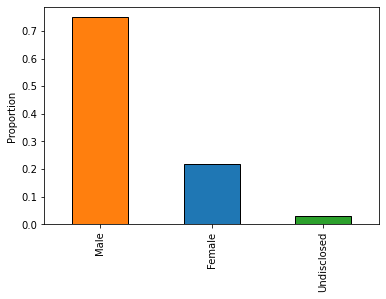

In [10]:
us_accounting['Gender'].value_counts(normalize=True).plot.bar(edgecolor='black', color={'tab:orange':"Male", 'tab:blue':"Female", 'tab:green':"Undisclosed"})
plt.ylabel('Proportion')
plt.show()

Because respondents with an Undisclosed `Gender` are only 3% of the dataset, I'm going to exlude them from any analysis I perform involving `Gender`.

In [11]:
females = us_accounting[us_accounting['Gender'] == 'Female']
males = us_accounting[us_accounting['Gender'] == 'Male']
print('Descriptive Statistics for Female Accountants')
print('-' * 100)
print(females.describe().to_string())
print()
print()
print("Descriptive Statistics for Male Accountants")
print('-' * 100)
print(males.describe().to_string())

Descriptive Statistics for Female Accountants
----------------------------------------------------------------------------------------------------
       Years Experience  Current Salary + Bonus  Years Public Before Exit  Average Hours Per Week
count        262.000000              262.000000                 49.000000              156.000000
mean           4.212595            78845.011450                  3.254755               45.429487
std            3.160262            28756.867626                  2.193291                6.595318
min            0.500000             8400.000000                  0.250000               20.000000
25%            2.000000            60000.000000                  2.000000               40.000000
50%            3.000000            71750.000000                  3.000000               45.000000
75%            5.500000            92850.000000                  4.000000               50.000000
max           18.000000           250000.000000                 14.00

Some interesting things to note:
* Many of these statistics are quite similar for Male vs Female accountants.
  * Mean, median, and std deviation for years experience, years public before exit, and average hours per week are all very close.  
* There is a difference in mean salary
* There are differences in max values for years experience, current salary, and years public before exit.  
  * The difference in max salary might be a contributing factor to the difference in mean salary. 

### Mean/Median Salary

In [12]:
female_median_salary = females['Current Salary + Bonus'].median()
male_median_salary = males['Current Salary + Bonus'].median()
female_mean_salary = females['Current Salary + Bonus'].mean()
male_mean_salary = males['Current Salary + Bonus'].mean()

Female Accountants
--------------------
Median Salary + Bonus : 71750.0
Mean Salary + Bonus:  78845.01145038167

Male Accountants
--------------------
Median Salary + Bonus: 72000.0
Mean Salary + Bonus:  86028.03125



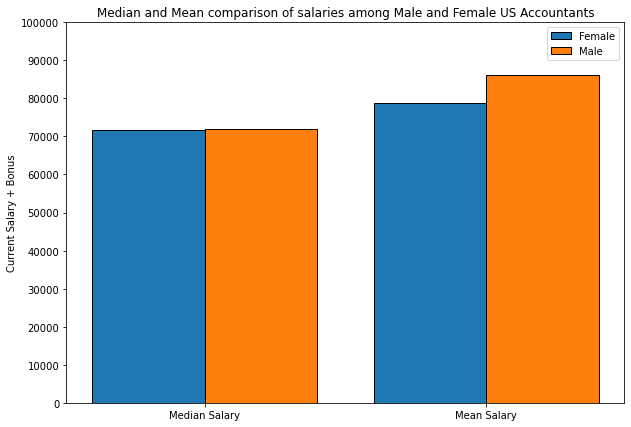

In [13]:
print('Female Accountants')
print('-'*20)
print('Median Salary + Bonus :', female_median_salary)
print('Mean Salary + Bonus: ', female_mean_salary)
print()
print('Male Accountants')
print('-'*20)
print('Median Salary + Bonus:', male_median_salary)
print('Mean Salary + Bonus: ', male_mean_salary)
print()
fig, ax = plt.subplots(figsize=(10,7))
ax.bar(1, female_median_salary, label='Female', width=0.5, color='tab:blue', edgecolor='black')
ax.bar(1.5, male_median_salary, label='Male', width=0.5, color='tab:orange', edgecolor='black')
ax.bar(2.25, female_mean_salary, label='Female', width=0.5, color='tab:blue', edgecolor='black')
ax.bar(2.75, male_mean_salary, label='Male', width=0.5, color='tab:orange', edgecolor='black')
plt.title('Median and Mean comparison of salaries among Male and Female US Accountants')
ax.set_xticks([1.25, 2.5])
ax.set_xticklabels(['Median Salary', 'Mean Salary'])
ax.set_yticks(np.arange(0, 100_001, 10_000))
ax.set_ylabel('Current Salary + Bonus')
# The next three lines remove duplicate entries from the legend by getting the labels and typecasting them as a dict, where the labels are set as keys, which are forced to be unique.
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.show()

The Median Salary is virtually the same for Male and Female accountants, but we see the gap in the mean mentioned earlier.  Let's continue investigating.

### Are there any differences among genders by years experience?  Could this be a reason for the gap in pay we've observed?

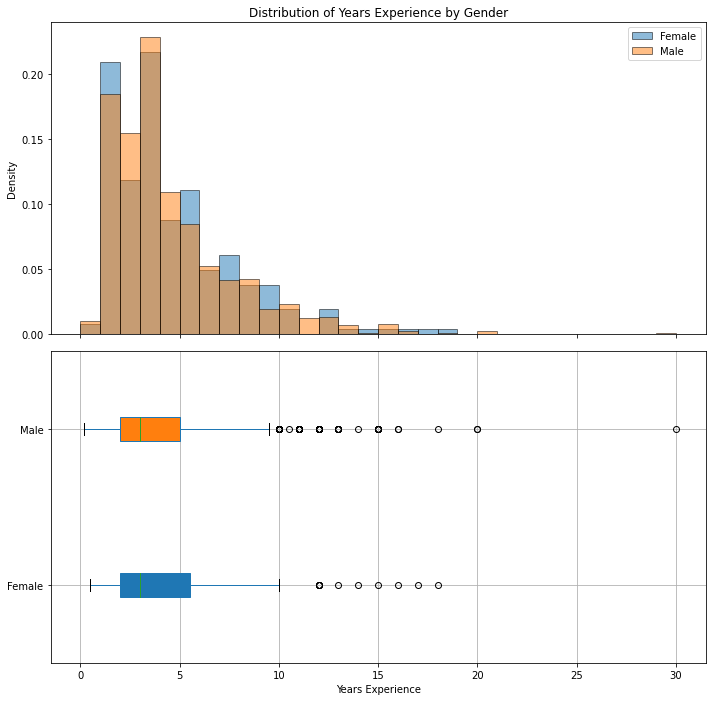

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,262.0,4.212595,3.160262,0.5,2.0,3.0,5.5,18.0
Male,896.0,4.083783,3.189866,0.2,2.0,3.0,5.0,30.0


In [14]:
m_f_groups = males_and_females.groupby('Gender')
exp_bins = np.arange(0, 31, 1)
gender_colors = ['tab:blue', 'tab:orange']

fig, ax = plt.subplots(2,1, sharex=True, figsize=(10,10))
m_f_groups['Years Experience'].plot.hist(bins=exp_bins, density=True, alpha=0.5, edgecolor='black', ax=ax[0])
ax[0].set_title('Distribution of Years Experience by Gender')
ax[0].set_xlabel(None)
ax[0].set_ylabel('Density')
ax[0].legend()

boxplot = males_and_females.boxplot(column='Years Experience', by='Gender', return_type='both', figsize=(7,7), patch_artist=True, ax=ax[1], vert=False)
ax[1].set_title(None)
ax[1].set_xlabel('Years Experience')
for row_key, (ax, row) in boxplot.iteritems():
    for i,box in enumerate(row['boxes']):
        box.set_facecolor(gender_colors[i])


fig.suptitle(None)
plt.tight_layout()
plt.show()

m_f_groups['Years Experience'].describe()

The descriptive statistics for both Male and Female accountants and their years of experience is virtually identical.  Looking at the histogram, both distributions are right skewed and fairly similar in shape.  No significant differences to be found here that would point towards male accountants having a higher mean salary due to having more experience.

### Digging further...`Line of Service` by `Gender` - Is there a pay gap among genders in different lines of service?

In [15]:
## This code is the basis for the graph below, groupby Line of Service, then by Gender, and unstacking the MultiIndex to get a psuedo pivot_table
los_by_gender = males_and_females.groupby(['Line of Service', 'Gender'])['Line of Service']
los_by_gender.count().unstack(level=-1, fill_value=0)

Gender,Female,Male
Line of Service,,
Advisory,32,99
Audit,92,389
Corporate,4,6
Finance,1,5
Forensic,0,1
Intern,0,1
Other,38,137
Tax,88,252
Tax and Audit,7,6


In the bar chart below, the 'Advisory', 'Audit', 'Other', and 'Tax' Lines of Service are the most common, each with a sample size greater than or equal to 30.  For this reason, I'm going to focus solely on these Lines of service for my analysis.

Also of note, it looks like most lines of service are dominated primarily by male accountants.

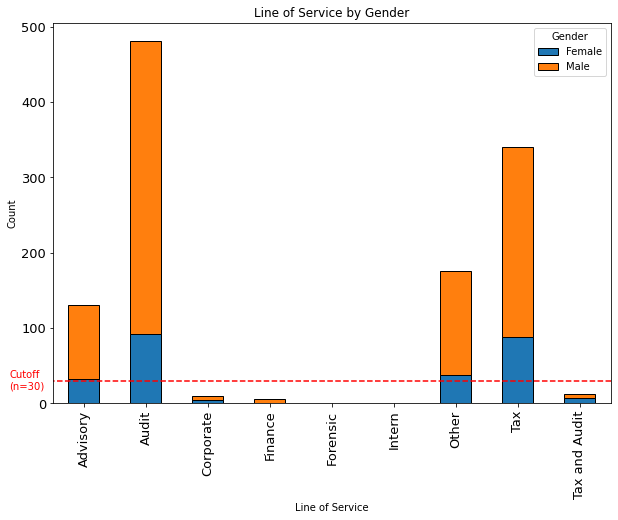

In [16]:
los_by_gender.count().unstack(level=-1, fill_value=0).plot(kind='bar', stacked=True,figsize=(10,7), fontsize=13, edgecolor='black')
plt.title('Line of Service by Gender')
plt.hlines(30, -3, 10, color='red', linestyle='--')
plt.text(-1.2, 30, 'Cutoff\n(n=30)', color='red', ha='left', va='center')
plt.ylabel('Count');

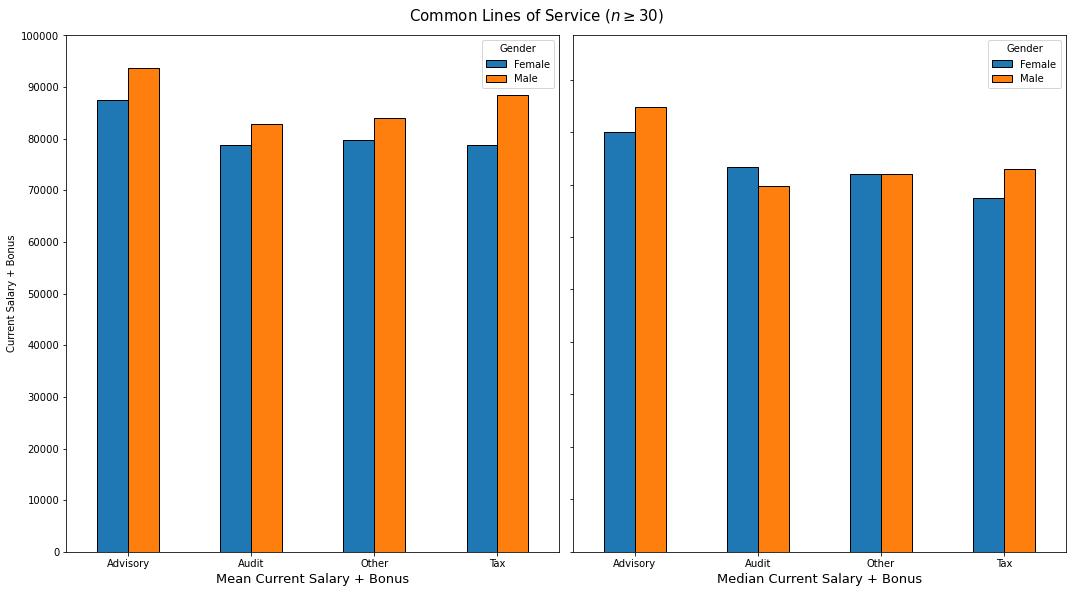

In [17]:
# To examine these groups, I'll extract the labels of the 4 most common Lines of Service.  With those labels, I'll create a new dataframe, using the labels as a filter
male_female_los_larger_30 = males_and_females.groupby(['Line of Service']).filter(lambda x: len(x) >= 30)

# With this new dataframe, we can check if the pay gap occurs between male and female accountants in these different lines of service
mean_pivot_tbl = male_female_los_larger_30.pivot_table(
    values="Current Salary + Bonus",
    index="Line of Service",
    columns="Gender",
    aggfunc="mean",
)
median_pivot_tbl = male_female_los_larger_30.pivot_table(
    values="Current Salary + Bonus",
    index="Line of Service",
    columns="Gender",
    aggfunc="median",
)
fig, ax = plt.subplots(1, 2, figsize= (15,8), sharey=True)
mean_pivot_tbl.plot(kind='bar', ax=ax[0], ec='black', rot=0)
ax[0].set_xlabel('Mean Current Salary + Bonus', fontsize=13)
ax[0].set_ylabel('Current Salary + Bonus')
median_pivot_tbl.plot(kind='bar', ax=ax[1], ec='black', rot=0)
ax[1].set_xlabel('Median Current Salary + Bonus', fontsize=13)
fig.text(0.5, 1, r'Common Lines of Service $(n\geq30)$', ha='center', fontsize=15)
ax[0].set_yticks(np.arange(0, 100_001, 10_000))
plt.tight_layout()
plt.show()

It looks like the mean salaries of male accountants are higher than female accountants for all of the most frequent accountant Lines of Service in the US.  

Furthermore the median male salary is higher than female accountants in half of the lines of service.  It appears a pay gap among gender is fairly consistent across all of the most common lines of service.

### Exploring `Current Industry` by Gender - Does the pay gap we saw in `Gender` across different lines of service also exist across different industries?

In the bar chart below, the industries 'Finance', 'Government', 'Manufacturing', 'Medical, 'Other', 'Public Accounting', and 'Technology' are the most common, each with a sample size greater than or equal to 30.  For this reason, I'm going to focus solely on these industries for my analysis.

We also see most, if not all, of these industries being dominated by male accountants.

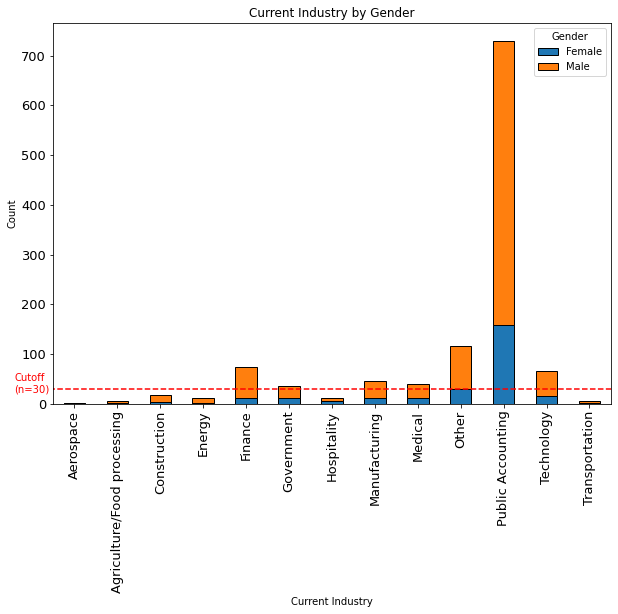

In [19]:
industry_by_gender = males_and_females.groupby(['Current Industry', 'Gender'])['Line of Service']

industry_by_gender.count().unstack(level=-1, fill_value=0).plot(kind='bar', stacked=True,figsize=(10,7), fontsize=13, edgecolor='black')
plt.title('Current Industry by Gender')
plt.hlines(30, -3, 20, color='red', linestyle='--')
plt.text(-1.4, 40, 'Cutoff\n(n=30)', color='red', ha='left', va='center')
plt.ylabel('Count');

In [20]:
# To examine these industries, I'll extract their labels and create a new dataframe, using the labels as a filter

industry_df_greater_30 = males_and_females.groupby('Current Industry').filter(lambda x: len(x)>=30)

# With the new dataframe, I can make a pivot table for the mean and median salaries
industry_df_pivot_tbl = industry_df_greater_30.pivot_table(values='Current Salary + Bonus', index='Current Industry', columns='Gender', aggfunc=['mean','median'])
industry_df_pivot_tbl

mean                   median          
Gender                    Female           Male    Female      Male
Current Industry                                                   
Finance            127068.181818  112697.269841  110000.0  102000.0
Government          93900.000000   66005.291667  103000.0   55000.0
Manufacturing       89636.363636   89151.428571   83000.0   82000.0
Medical             79750.000000  128011.111111   72750.0   85000.0
Other               81224.137931   94527.586207   80000.0   80000.0
Public Accounting   72991.779874   76629.492982   65000.0   68000.0
Technology          79040.625000  121155.000000   76250.0  110000.0

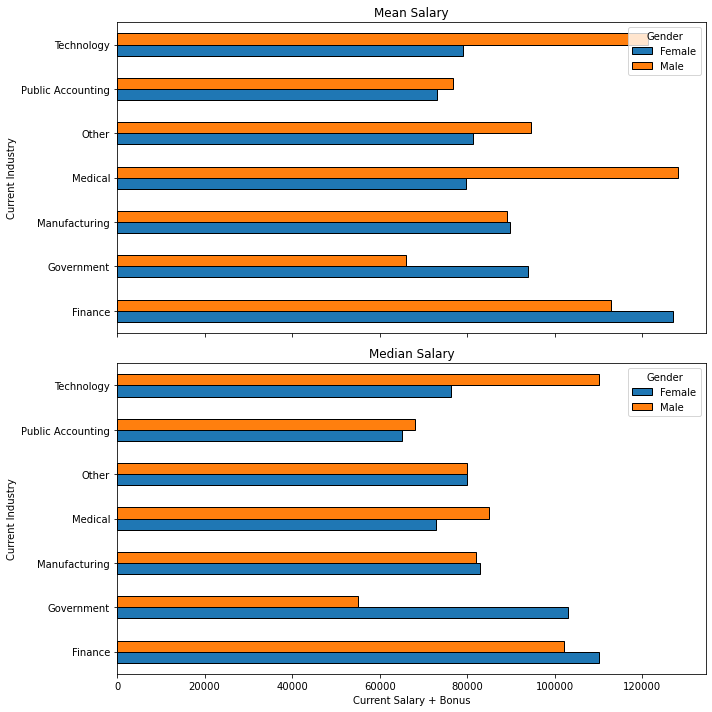

In [21]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize = (10,10))
industry_df_pivot_tbl['mean'].plot.barh(ax = ax[0], edgecolor='black')
ax[0].set_title('Mean Salary')
#ax[0].legend(bbox_to_anchor=(0.4, 0.8, 0.4, 0.8))

industry_df_pivot_tbl['median'].plot.barh(ax=ax[1], edgecolor='black')
ax[1].set_title('Median Salary')
ax[1].set_xlabel('Current Salary + Bonus')

plt.tight_layout()
plt.show()

It appears that mean and median Male Salaries tend to be higher for most industries, however not all of them.  For instance, mean and median Female salaries are higher in Manufacturing, Government, and Finance.  These results point towards a little more gender equality, however further investigation is still needed.

### Exploring outlier Salaries - What can they tell us about the pay gap?

To start, we will go back to our entire sample (n=1196) and define a salary as being an outlier if it's further than $\pm2\sigma$ from the mean.

In [22]:
us_salaries = us_accounting['Current Salary + Bonus']
us_sal_mean = np.mean(us_salaries)
us_sal_std = np.std(us_salaries)
lower_fence = us_sal_mean - 2 * us_sal_std
upper_fence = us_sal_mean + 2 * us_sal_std
salaries_without_outliers = us_accounting[(us_salaries >= lower_fence) & (us_salaries <= upper_fence)]
salary_outliers = us_accounting[(us_salaries >= upper_fence) | (us_salaries <= lower_fence)]
num_accountants = len(us_accounting['Current Salary + Bonus'])
num_accountants_not_outliers = len(salaries_without_outliers)
num_accountants_outliers = len(salary_outliers)
print("Number of US Accountants that aren't outliers:", num_accountants_not_outliers)
print("Number of US Accountants that are outliers:", num_accountants_outliers)

Number of US Accountants that aren't outliers: 1159
Number of US Accountants that are outliers: 37


Let's begin by looking at the distribution of salaries for all US accountants when we include outliers, versus when we exclude them.

Descriptive stats for Current Salary + Bonus for ALL US Accountants, including outliers
------------------------------------------------------------------------------------------
count      1196.000000
mean      85394.138378
std       47304.234455
min        8400.000000
25%       60000.000000
50%       72000.000000
75%       95000.000000
max      750000.000000

Descriptive stats for Current Salary + Bonus for US Accountants, WITHOUT outliers
------------------------------------------------------------------------------------------
count      1159.000000
mean      79628.895168
std       27349.147961
min        8400.000000
25%       60000.000000
50%       72000.000000
75%       93800.000000
max      176250.000000



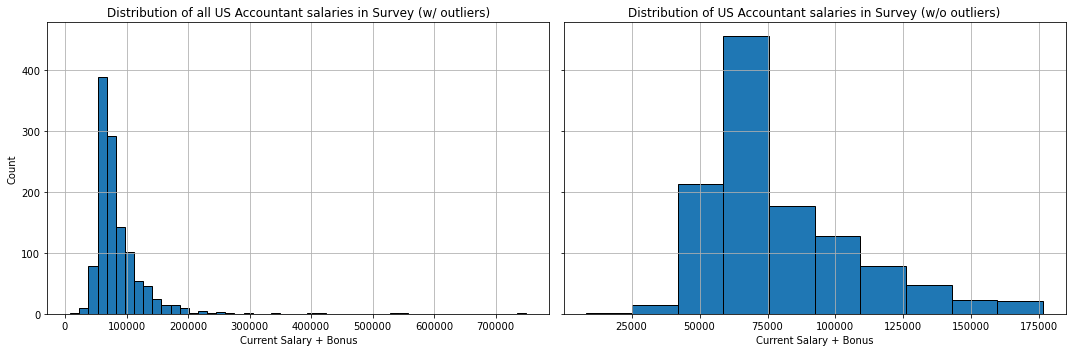

In [23]:
print('Descriptive stats for Current Salary + Bonus for ALL US Accountants, including outliers')
print('-'*90)
print(us_accounting['Current Salary + Bonus'].describe().to_string())
print()
print('Descriptive stats for Current Salary + Bonus for US Accountants, WITHOUT outliers')
print('-'*90)
print(salaries_without_outliers['Current Salary + Bonus'].describe().to_string())
print()
fig100, ax100 = plt.subplots(1, 2, sharey=True)
ax100[0].set(title='Distribution of all US Accountant salaries in Survey (w/ outliers)', xlabel='Current Salary + Bonus', ylabel='Count')
us_accounting['Current Salary + Bonus'].hist(bins=50, ax=ax100[0], figsize=(15,5), edgecolor='black')
ax100[1].set(title='Distribution of US Accountant salaries in Survey (w/o outliers)', xlabel='Current Salary + Bonus')
salaries_without_outliers['Current Salary + Bonus'].hist(ax=ax100[1], edgecolor='black')
plt.tight_layout();

They are both right skewed, but with a max of 176,250 when excluding outliers, as opposed to 750,000 when including them.

Understanding these outliers can help shed more light on whether the mean salary for male accountants is higher than for female accountants.  Let's examine them next.

#### Outlier Salaries - A Closer look

Descriptive Stats for OUTLIER Current Salary + Bonus for US Accountants
--------------------------------------------------
count        37.000000
mean     265986.486486
std      125017.581346
min      180000.000000
25%      190000.000000
50%      220000.000000
75%      265000.000000
max      750000.000000



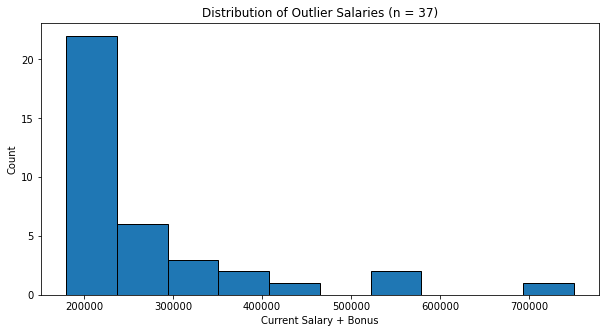

In [37]:
# Create a function to label an entry in our dataframe as an outlier or not

def is_it_an_outlier(x):
    if x >= lower_fence and x<= upper_fence:
        return 'No'
    else:
        return 'Yes'
us_accounting['Outlier Salary'] = us_accounting['Current Salary + Bonus'].apply(is_it_an_outlier)

print('Descriptive Stats for OUTLIER Current Salary + Bonus for US Accountants')
print('-'*50)
print(salary_outliers['Current Salary + Bonus'].describe().to_string())
print()
fig5 = plt.figure(figsize=(10,5))
ax5 = fig5.add_subplot(111)
ax5.set(title='Distribution of Outlier Salaries (n = ' + str(num_accountants_outliers) + ')', xlabel='Current Salary + Bonus', ylabel='Count')

N, bins, patches = ax5.hist(salary_outliers['Current Salary + Bonus'], edgecolor='black')
#patches[9].set_facecolor('red');

The distribution is still right skewed with some extremely high salaries.

#### Comparing Years Experience - Could these outliers be earning more because they have more experience?

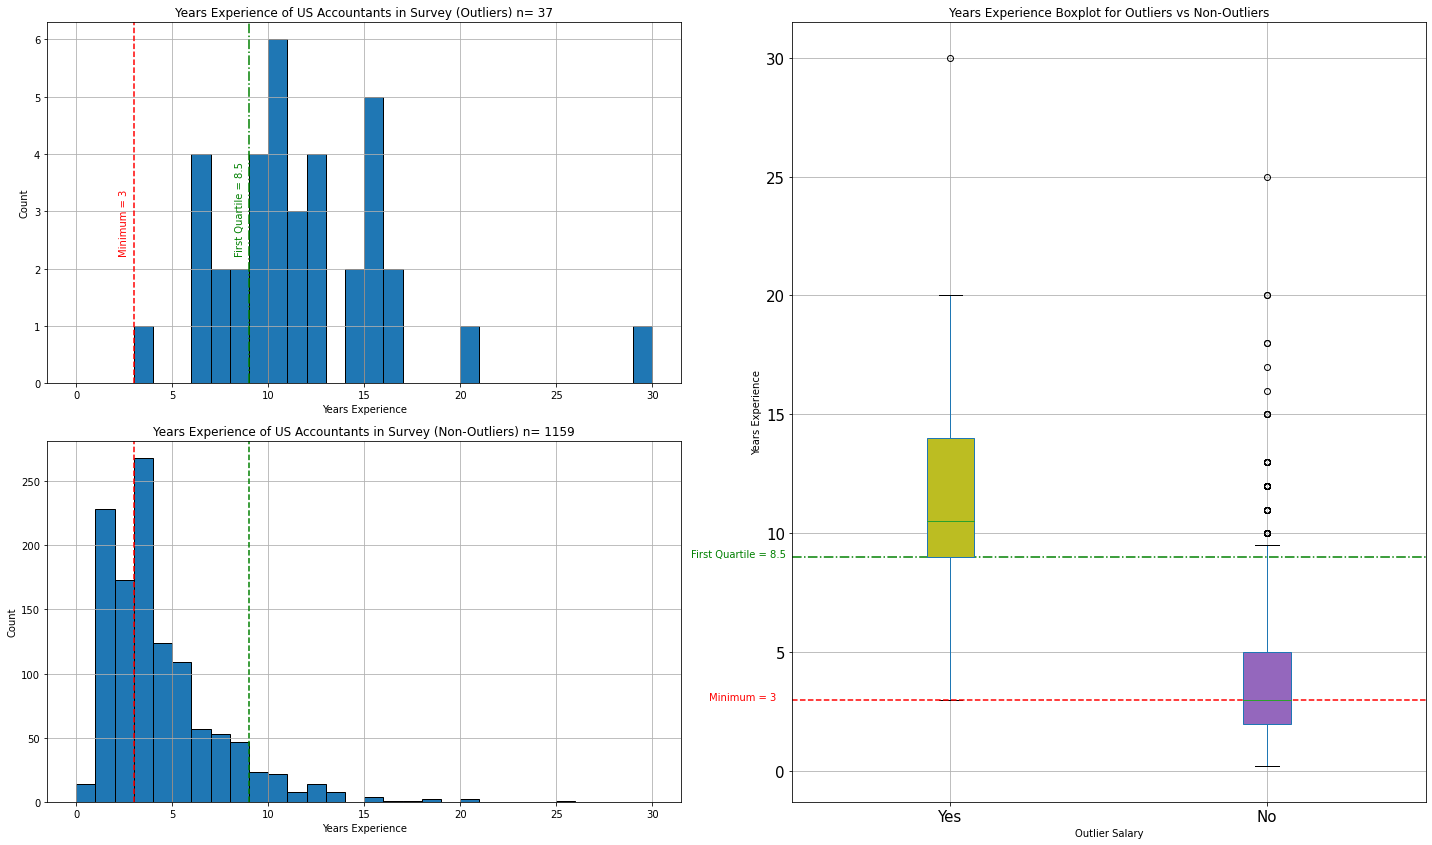

Descriptive stats for Current Salary + Bonus for ALL US Accountants, including outliers
------------------------------------------------------------------------------------------
count    37.000000
mean     11.371622
std       4.763731
min       3.000000
25%       9.000000
50%      10.500000
75%      14.000000
max      30.000000

Descriptive stats for Current Salary + Bonus for US Accountants, WITHOUT outliers
------------------------------------------------------------------------------------------
count    1159.000000
mean        3.919387
std         2.952131
min         0.200000
25%         2.000000
50%         3.000000
75%         5.000000
max        25.000000



In [26]:
yes_no_clrs = ['tab:purple', 'tab:olive']
figure = plt.figure(figsize=(20,12))
a1 = plt.subplot2grid((2,2), (0,0))
a2 = plt.subplot2grid((2,2), (1,0))
a3 = plt.subplot2grid((2,2), (0,1), rowspan=2)

#fig5 = plt.figure(figsize=(8,10))
#ax5 = fig5.add_subplot(211)
a1.set(title='Years Experience of US Accountants in Survey (Outliers) n= ' + str(len(salary_outliers)), xlabel='Years Experience', ylabel='Count')
outlier_min_yrs_exp = salary_outliers['Years Experience'].quantile(0)
outlier_first_quartile_yrs_exp = salary_outliers['Years Experience'].quantile(0.25)
a1.axvline(outlier_min_yrs_exp, color='red', linestyle='--')
a1.axvline(outlier_first_quartile_yrs_exp, color='green', linestyle='-.')
a1.text(outlier_min_yrs_exp - 0.75, 2.25, 'Minimum = 3', color='red', rotation=90)
a1.text(outlier_first_quartile_yrs_exp - 0.75, 2.25, 'First Quartile = 8.5', color='green', rotation=90)
salary_outliers['Years Experience'].hist(edgecolor='black', bins = exp_bins, ax=a1)

#ax6 = fig5.add_subplot(212, sharex=ax5)
a2.set(title='Years Experience of US Accountants in Survey (Non-Outliers) n= ' + str(len(salaries_without_outliers)), xlabel='Years Experience', ylabel='Count')
a2.axvline(outlier_min_yrs_exp, color='red', linestyle='--')
a2.axvline(outlier_first_quartile_yrs_exp, color='green', linestyle='--')
#ax6.text(outlier_min - 0.75, 200.25, 'Minimum = 3', rotation=90, color='red')
salaries_without_outliers['Years Experience'].hist(edgecolor='black', bins=exp_bins, ax = a2)

boxplot = us_accounting.boxplot(column='Years Experience', by='Outlier Salary', figsize=(10,5), fontsize=15, positions=[2,1], ax=a3, return_type='both', patch_artist=True)
a3.axhline(outlier_min_yrs_exp, color='red', linestyle='--')
a3.text(0.45, outlier_min_yrs_exp, 'Minimum = 3', ha='right', color='red')
a3.axhline(outlier_first_quartile_yrs_exp, color='green', linestyle='-.')
a3.text(0.48, outlier_first_quartile_yrs_exp, 'First Quartile = 8.5', ha='right', color='green')
a3.set_ylabel('Years Experience')
a3.set_title('Years Experience Boxplot for Outliers vs Non-Outliers')
figure.suptitle('')



for row_key, (ax, row) in boxplot.iteritems():
    for i,box in enumerate(row['boxes']):
        box.set_facecolor(yes_no_clrs[i])
        
plt.tight_layout()
plt.show();

print('Descriptive stats for Current Salary + Bonus for ALL US Accountants, including outliers')
print('-'*90)
print(salary_outliers['Years Experience'].describe().to_string())
print()
print('Descriptive stats for Current Salary + Bonus for US Accountants, WITHOUT outliers')
print('-'*90)
print(salaries_without_outliers['Years Experience'].describe().to_string())
print()

It looks like these outlier accountants tend to have more years of experience as compared to the rest:

* **The histogram for accountants considered an outlier by their salary is more dense at higher years of experience (5+ yrs) than for accountants not considered outliers**
* **The minimum years experience (3) for outlier accountants in the boxplot is more experience than 50% of the non-outliers posses.**
* **The first quartile of years experience (8.5) for outlier accountants is more experience than nearly all of the non-outliers posses.**

It certainly does look like the high amount of experience could be a contributing factor to why these accountants have such high salaries.  It's too bad we don't have any information as to the position within a company of anyone in the survey as this would provide further insight about these outiers.  

### Do these outliers earn more because they work more?

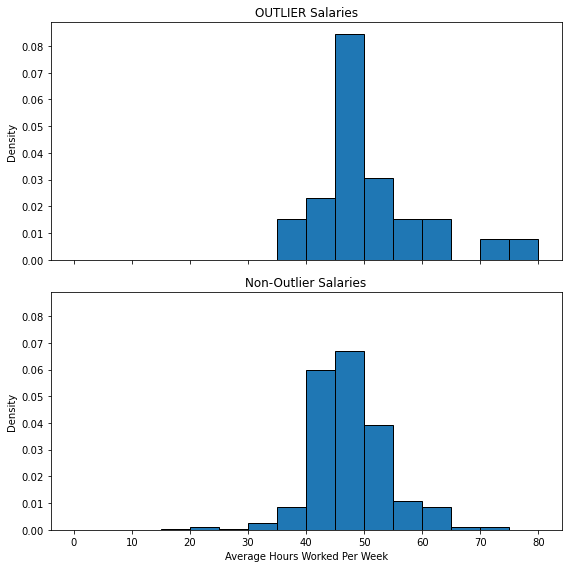

In [38]:
fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(8,8))
salary_outliers['Average Hours Per Week'].plot.hist(ax=ax[0], edgecolor='black', bins = np.arange(0, 81, 5), density=True)
ax[0].set_title('OUTLIER Salaries')
ax[0].set_ylabel('Density')
#ax[0].set_xlabel('Average Hours Worked Per Week')

salaries_without_outliers['Average Hours Per Week'].plot.hist(ax=ax[1], edgecolor='black', bins = np.arange(0, 81, 5), density=True)
ax[1].set_title('Non-Outlier Salaries')
ax[1].set_xlabel('Average Hours Worked Per Week')
ax[1].set_ylabel('Density')

plt.tight_layout()
plt.show()

The shapes of these distributions are fairly similar.  The majority of accountants work between an average of 40 and 55 hours per week whether their salaries are considered to be an outlier or not.  For accountants considered outliers, there are slightly higher densities of those who work above 55 hours per week, but overall I don't think there's strong evidence here indicating these outliers earn more because they work more.

#### Outlier by gender - How are the outlier salaries distributed among gender and line of service?
**Note: For the remainder of the outlier analysis by gender, we have excluded Undisclosed genders, bringing us down from 37 to 33 accountants considered outliers.**

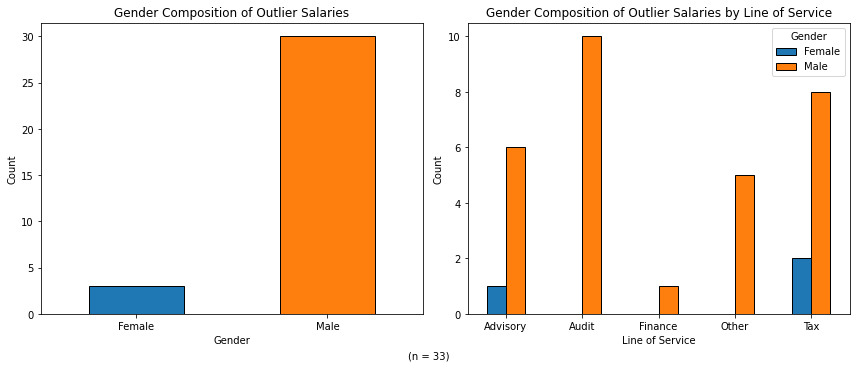

In [39]:
outlier_pivot_tbl = salary_outliers[(salary_outliers['Gender']!='Undisclosed')].pivot_table(
    values='Current Salary + Bonus', 
    index='Line of Service', 
    columns='Gender', 
    aggfunc='count', 
    fill_value=0
)
fig, ax = plt.subplots(1,2, figsize=(12,5))
salary_outliers[salary_outliers['Gender']!='Undisclosed']['Gender'].value_counts().sort_values().plot(kind='bar', color=['tab:blue','tab:orange'], ax=ax[0], rot=0, edgecolor='black')
ax[0].set_title('Gender Composition of Outlier Salaries')
ax[0].set_xlabel('Gender')
ax[0].set_ylabel('Count')

outlier_pivot_tbl.plot(kind='bar', ax=ax[1], rot=0, edgecolor='black')
ax[1].set_title('Gender Composition of Outlier Salaries by Line of Service')
ax[1].set_ylabel('Count')

fig.text(0.5, 0, '(n = {})'.format(len(salary_outliers[salary_outliers['Gender']!='Undisclosed']['Gender'])), va='center', ha='center')
plt.tight_layout()
plt.show()

An overwhelming majority of these outliers are male accountants, across all of the common lines of service, which is likely a contributing factor causing the pay gap in mean salaries that we observed earlier.

For now, let's shift our focus from outliers and go back to all accountants again.

### What can the distribution of salaries by gender tell us?

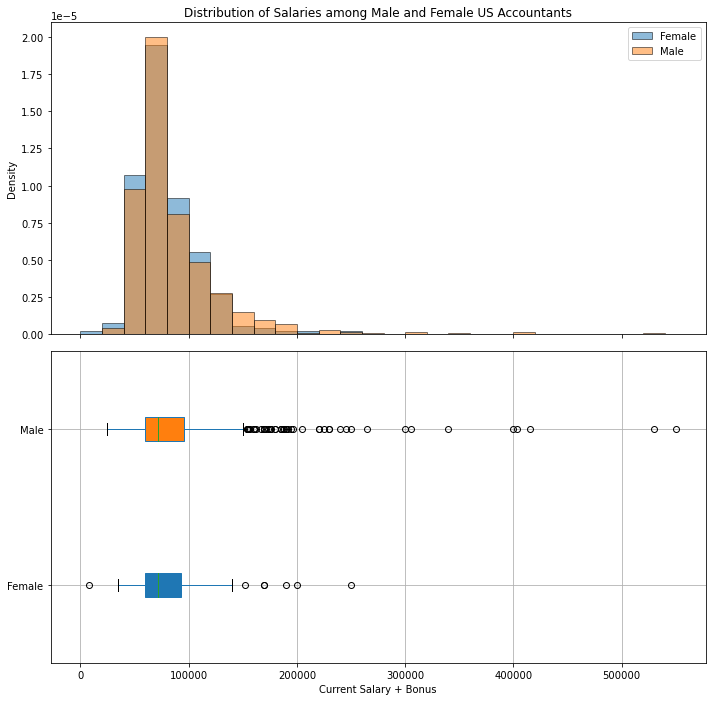

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,262.0,78845.01145,28756.867626,8400.0,60000.0,71750.0,92850.0,250000.0
Male,896.0,86028.03125,46224.577844,25000.0,60000.0,72000.0,96000.0,550000.0


In [40]:
male_and_female_max_sal = males_and_females['Current Salary + Bonus'].max()



fig, ax = plt.subplots(2, 1, sharex=True, figsize=(10,10))

m_f_groups['Current Salary + Bonus'].plot.hist(alpha=0.5, bins = np.arange(0, male_and_female_max_sal, 20_000), edgecolor='black', density=True, ax=ax[0])
ax[0].legend()
ax[0].set_ylabel('Density')
ax[0].set_title('Distribution of Salaries among Male and Female US Accountants')

boxplot = males_and_females.boxplot(column='Current Salary + Bonus', by='Gender', return_type = 'both', patch_artist=True, ax=ax[1], vert=False)
ax[1].set_title(None)
ax[1].set_xlabel('Current Salary + Bonus')
for row_key, (ax, row) in boxplot.iteritems():
    for i,box in enumerate(row['boxes']):
        box.set_facecolor(gender_colors[i])

plt.suptitle(None)
plt.tight_layout()
plt.show()

m_f_groups['Current Salary + Bonus'].describe()

Based on the descriptive statistics, the minimum, 75th percentile, and maximum for male salaries are higher than those of female accountants, significantly higher with regards to the maximum.  

In the histogram, the difference between density in each bin are quite minimal, however in the right tail, above a salary of 140,000, we see larger densities of male accountants.

**Conclusion: There are multiple pieces of evidence indicating that a pay gap may exist, enough to warrant further investigation.  Running a hypothesis test to see if these differences in pay are simply the result of random chance might be a good idea.**

For now, I'm going to go back and explore other facets of the dataset.

### Exploring `Line of Service` and `Current Salary + Bonus` - Do certain Lines of Service earn more?

For now, we'll go back to examining our entire dataset (n=1196).  Let's figure out which Lines of Service have a sample size of 30 or more and then explore those.

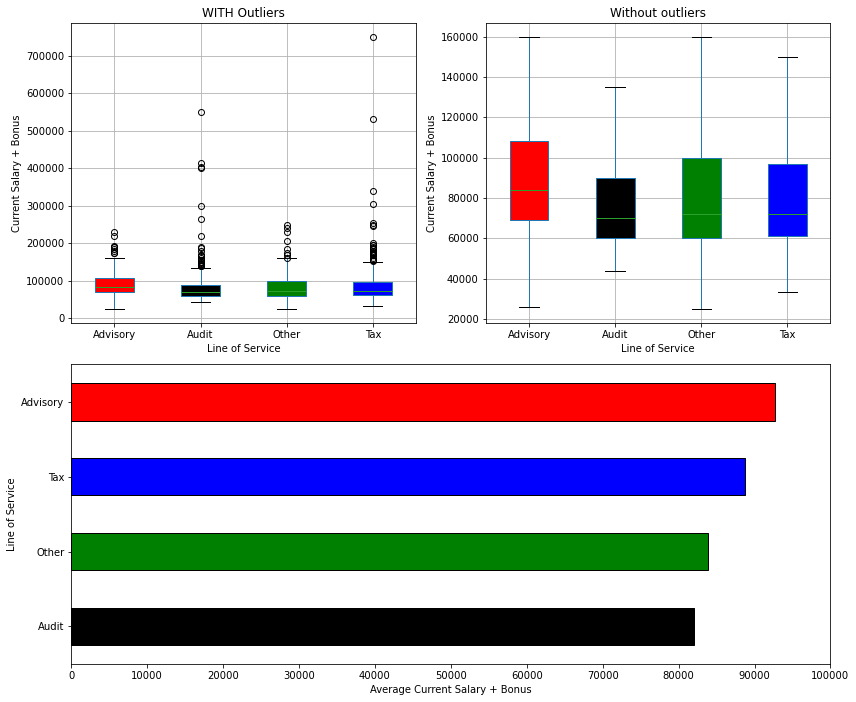

,count,mean,std,min,25%,50%,75%,max
Line of Service,,,,,,,,
Advisory,136.0,92729.058824,36718.606294,26000.0,69000.0,84000.0,108500.0,230000.0
Audit,489.0,82085.687117,44469.190849,44000.0,60000.0,70000.0,90000.0,550000.0
Other,181.0,83842.679558,37642.241965,25000.0,60000.0,72000.0,100000.0,250000.0
Tax,357.0,88680.585434,58067.571625,33600.0,61000.0,72000.0,97000.0,750000.0


In [41]:
los_df_larger_30 = us_accounting.groupby('Line of Service').filter(lambda x: len(x)>= 30)

los_colors = ['red', 'black', 'green', 'blue']
fig = plt.figure(figsize=(12,10))
gs = GridSpec(2,2, figure=fig)
#fig, ax = plt.subplots(1,2, figsize=(14,7))
ax1 = fig.add_subplot(gs[0, 0])
boxplot1 = los_df_larger_30.boxplot(column='Current Salary + Bonus', by='Line of Service', ax=ax1, patch_artist=True, return_type='both')
ax1.set_title('WITH Outliers')
ax1.set_ylabel('Current Salary + Bonus')

ax2 = fig.add_subplot(gs[0,1])
boxplot2 = los_df_larger_30.boxplot(column='Current Salary + Bonus', by='Line of Service', ax=ax2, patch_artist=True, return_type='both', showfliers=False)
ax2.set_title('Without outliers')
ax2.set_ylabel('Current Salary + Bonus')
for row_key, (ax, row) in boxplot1.iteritems():
    for i,box in enumerate(row['boxes']):
        box.set_facecolor(los_colors[i])
for row_key, (ax, row) in boxplot2.iteritems():
    for i,box in enumerate(row['boxes']):
        box.set_facecolor(los_colors[i])

ax3 = fig.add_subplot(gs[1,:])
los_df_larger_30.groupby('Line of Service')['Current Salary + Bonus'].agg('mean').sort_values().plot(kind='barh', color=['black', 'green', 'blue', 'red'], edgecolor='black', ax=ax3)
ax3.set_xlabel('Average Current Salary + Bonus')
ax3.set_xticks(np.arange(0, 100_001, 10_000))
plt.suptitle(None)
plt.tight_layout()
plt.show()

los_df_larger_30.groupby('Line of Service')['Current Salary + Bonus'].describe()

Advisory seems to have the highest mean and median salaries, yet tends to have less outliers.  

On the other hand, Tax has the second highest mean and median salaries, yet with more outliers, one of which happens to be the maximum salary in our dataset. 

It's interesting how Audit has the lowest mean Salary, yet it has a significant number of outliers.  If we exclude outliers, Audit has the narrowest range of salaries.

So far, there may be a difference in pay among the common lines of service, with Advisory and Tax tending to earn more.  Let's continue to explore.

### Do certain lines of service earn more because they work more?

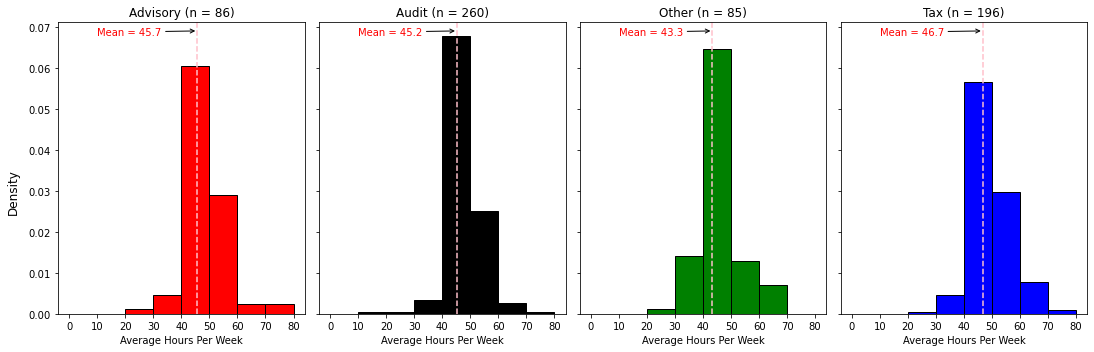

In [51]:
groups = us_accounting[us_accounting['Average Hours Per Week'].notnull()==True].groupby('Line of Service')
fig, ax = plt.subplots(1, 4, figsize=(15,5), sharex=True, sharey=True)
i=0
for name, group in groups:
    sample_size = len(groups.get_group(name)) 
    if sample_size >= 30:
        group_mean = group['Average Hours Per Week'].mean()
        ax[i].hist(group['Average Hours Per Week'], bins = np.arange(0, 81, 10), label=name, edgecolor='black', density=True, color=los_colors[i])
        #us_accounting[us_accounting['Line of Service'] == name]['Average Hours Per Week'].plot(kind='hist', edgecolor='black', alpha=0.5, label=name)
        ax[i].set_xlabel('Average Hours Per Week')
        ax[i].set_title(name + " (n = " + str(sample_size) +")")
        ax[i].axvline(group_mean, color='pink', ls='--')
        ax[i].set_xticks(np.arange(0, 81, 10))
        ax[i].annotate('Mean = {:.1f}'.format(group_mean), xy=(group_mean, 0.069), xytext=(10, 0.068), color='red', arrowprops= {'arrowstyle':'->', 
                'connectionstyle':'arc3'})
        i+=1
fig.text(-0.01, .4, 'Density', rotation='vertical', fontsize=12)
fig.tight_layout();

The distribution of Average Hours Per Week looks pretty similar for Advisory, Audit, and Tax, all of which have very similar means.  The only exception is the Other category, where there are slightly more accountants concentrated in the lower Average hours per week and the mean is slightly lower as a result.

So far, it seems like 45+ hours per week is fairly typical for an accountant and the discepancy in mean/median salaries seems to be for reasons other than the amount of hours one works per week.

### How does `Years Experience` compare by `Line of Service`, could this explain the differences observed earlier?

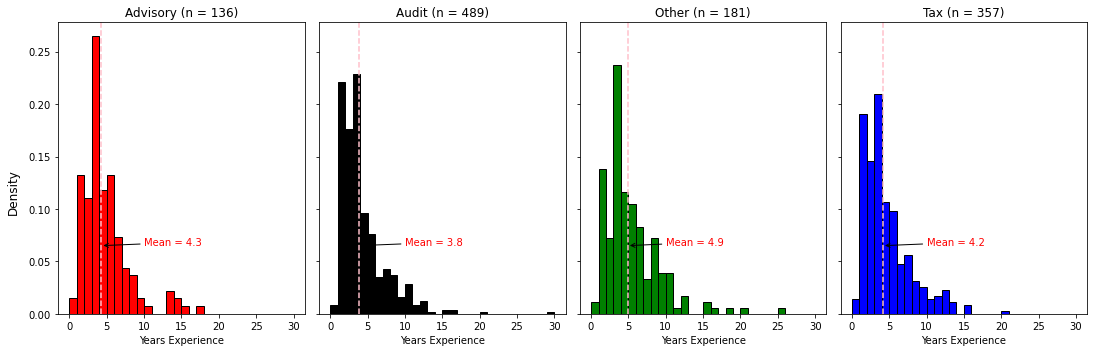

In [54]:
groups = us_accounting[us_accounting['Years Experience'].notnull()==True].groupby('Line of Service')
fig, ax = plt.subplots(1, 4, figsize=(15,5), sharex=True, sharey=True)
i=0
for name, group in groups:
    sample_size = len(groups.get_group(name)) 
    if sample_size >= 30:
        group_mean = group['Years Experience'].mean()
        ax[i].hist(group['Years Experience'], bins = np.arange(0, 31, 1), label=name, edgecolor='black', density=True, color=los_colors[i])
        #us_accounting[us_accounting['Line of Service'] == name]['Average Hours Per Week'].plot(kind='hist', edgecolor='black', alpha=0.5, label=name)
        ax[i].set_xlabel('Years Experience')
        ax[i].set_title(name + " (n = " + str(sample_size) +")")
        ax[i].axvline(group_mean, color='pink', ls='--')
        ax[i].set_xticks(np.arange(0, 31, 5))
        ax[i].annotate('Mean = {:.1f}'.format(group_mean), xy=(group_mean, 0.065), xytext=(10, 0.065), color='red', arrowprops= {'arrowstyle':'->', 
                'connectionstyle':'arc3'})
        i+=1
fig.text(-0.01, .4, 'Density', rotation='vertical', fontsize=12)
fig.tight_layout();

The distributions are all fairly similar and nothing immediately stands out which could be contributing to one line of service earning more than another. 

#### What do the distributions of Salaries by Line of Service tell us?

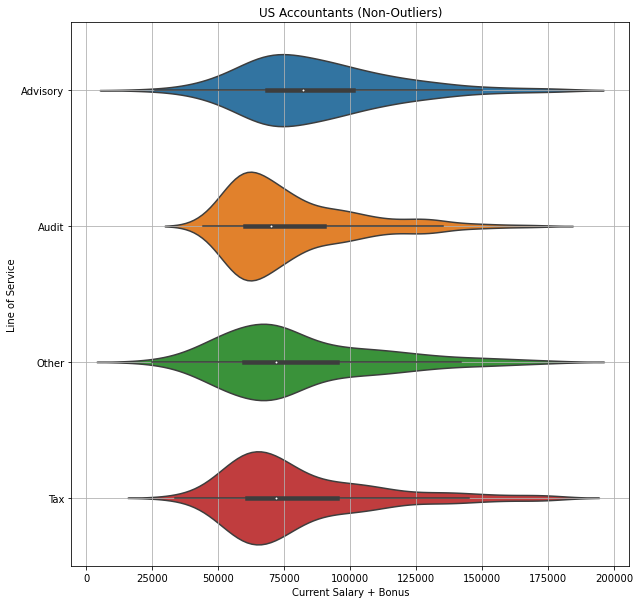

In [56]:
common_los_no_outliers = salaries_without_outliers[salaries_without_outliers['Line of Service'].isin(['Advisory', 'Audit', 'Tax', 'Other'])]
common_los_no_outliers_sorted = common_los_no_outliers.sort_values('Line of Service')

plt.figure(figsize=(10,10))
sns.violinplot(y='Line of Service', x='Current Salary + Bonus', data=common_los_no_outliers_sorted)
plt.title('US Accountants (Non-Outliers)')
plt.grid()
plt.show()

These distributions are all right skewed with Audit and Tax having higher peaks at lower salaries as compared to Advisory and Other.  Advisory and Other are less peaky and more spread out.  Overall though, Salaries seem to be roughly distributed in the same way across these four lines of service.

**Conclusion: There may be small differences in salaries among the four most common lines of service, but with the analysis performed so far, there's nothing conclusive.**

### Exploring Cost of Living (COL) by Current Salary + Bonus - Do we see a change in salary based on COL?

In [57]:
us_accounting['What COL is your region?'].value_counts()

Medium    532
High      490
Low       174
Name: What COL is your region?, dtype: int64

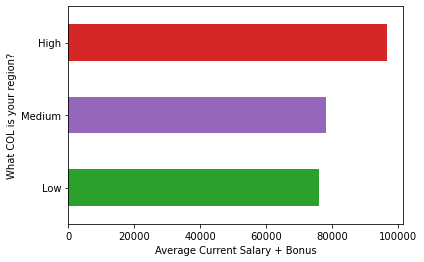

In [58]:
col_colors = ['tab:green', 'tab:purple', 'tab:red']
us_accounting.groupby('What COL is your region?').agg('mean')['Current Salary + Bonus'].sort_values(ascending=True).plot(kind='barh', color=col_colors)
plt.xlabel('Average Current Salary + Bonus');

Average salaries are very similar for Medium or Low COL, however there is a sizeable salary increase for High COL.

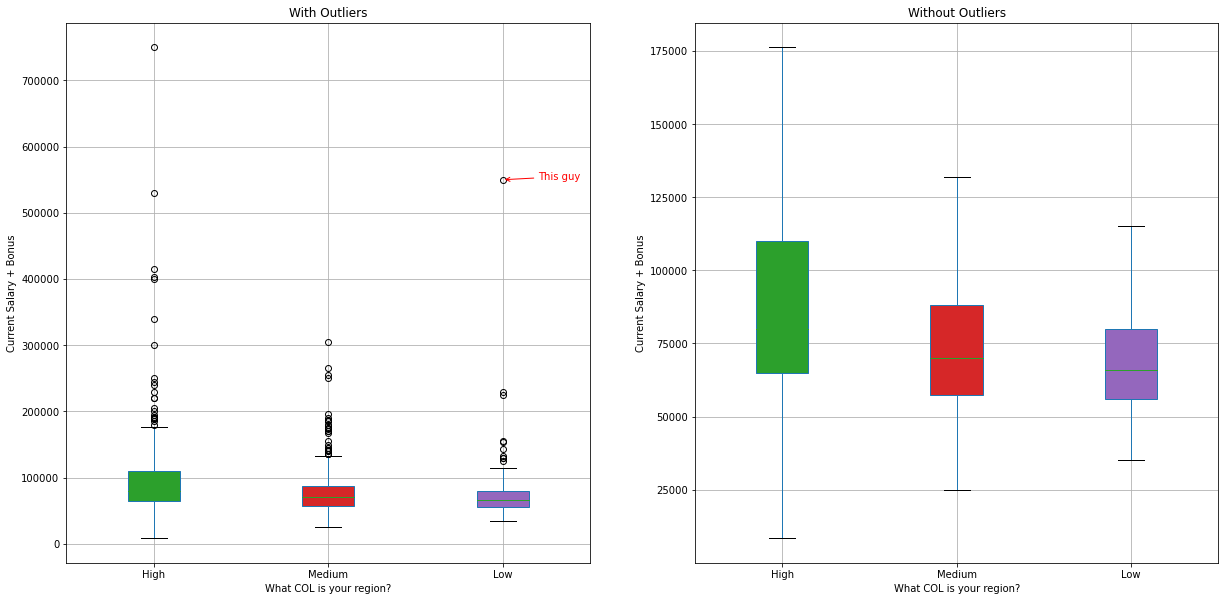


                          count          mean           std      min       25%      50%       75%       max
What COL is your region?                                                                                   
High                      490.0  96681.777551  58182.964830   8400.0  65000.00  80000.0  110000.0  750000.0
Low                       174.0  75959.741379  45443.208858  35000.0  56000.00  66075.0   80000.0  550000.0
Medium                    532.0  78083.314850  32330.583633  25000.0  57437.25  70000.0   88000.0  305000.0



In [59]:
col_groups = us_accounting.groupby('What COL is your region?')

fig, ax = plt.subplots(1,2, figsize=(20,10))
boxplot1 = us_accounting.boxplot(
    column='Current Salary + Bonus', 
    by='What COL is your region?', 
    positions=[1, 3, 2], 
    ax=ax[0], 
    patch_artist=True, 
    return_type='both'
)
ax[0].set_title('With Outliers')
ax[0].set_ylabel('Current Salary + Bonus')
ax[0].annotate(
    'This guy', 
    xy=(3, 550_000), 
    xytext=(3.2, 550_000),
    color='red',
    arrowprops={'arrowstyle':'->', 
                'connectionstyle':'arc3',
                "color":'red'
                }
)
        
        
boxplot2 = us_accounting.boxplot(
    column='Current Salary + Bonus', 
    by='What COL is your region?', 
    positions=[1, 3, 2], 
    ax=ax[1],
    patch_artist=True,
    return_type='both',
    showfliers=False
)
ax[1].set_title('Without Outliers')
ax[1].set_ylabel('Current Salary + Bonus')

for row_key, (ax, row) in boxplot1.iteritems():
    for i,box in enumerate(row['boxes']):
        box.set_facecolor(col_colors[i])

for row_key, (ax, row) in boxplot2.iteritems():
    for i,box in enumerate(row['boxes']):
        box.set_facecolor(col_colors[i])

plt.suptitle(None)
plt.show()

print()
print(col_groups['Current Salary + Bonus'].describe().to_string())
print()

* **High COL**
  * Has the widest range, with or without outliers.
  * Has highest mean and median salary.
 
* **Medium COL**
  * Has the second widest range without outliers
  * Has nearly the second largest with outliers, however there is one outlier (see 'This Guy' in Boxplot) in Low COL that prevents this from being true.

* **Low COL**
  * Has the narrowest range for non-outliers
  * Has the second widest range with outliers, but only because of that one outlier again.

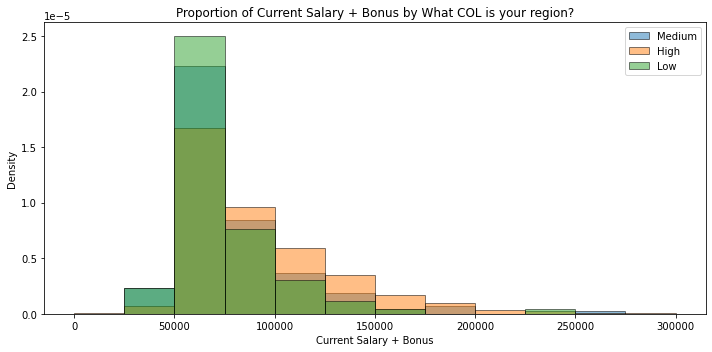

In [60]:
distribution_plotter_fancy(us_accounting, 'What COL is your region?', 'Current Salary + Bonus', bins = np.arange(0, 300_001, 25_000), normal=True)

Based on the histogram above, people with High COL do tend to have a greater density of accountants who earn higher salaries as compared to Medium COL, with increasingly higher density for each bin in the salary range 75,000 - 225,000.  Low COL has the largest density of salaries below 75,000.

**Conclusion: It looks like salary does change based on COL, however it is most noticeable going from Medium to High COL**

# Exploring by `'Has CPA'` - Which accountants have their CPA and which don't?

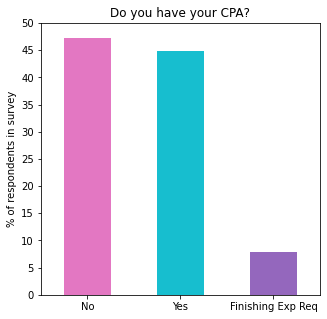

In [61]:
has_cpa_colors = ['tab:pink', 'tab:cyan', 'tab:purple']

fig, ax = plt.subplots(1,1, figsize=(5,5))
(us_accounting['Has CPA'].value_counts(normalize=True) * 100).plot(kind='bar', color=has_cpa_colors, rot=0, ax=ax)
ax.set_title('Do you have your CPA?')
ax.set_ylabel('% of respondents in survey')
ax.set_yticks(np.arange(0, 51, 5))
plt.show()

It's interesting to note that while the majority of US accountants in this survey don't have their CPA, roughly the same proportion of accountants do have their CPA.  Passing all four sections of the CPA exam is incredibly difficuly and according to this website https://www.gleim.com/cpa-review/exam-pass-rates/, the average pass rate has been between 45%-50% from 2006 to 2020, which lines up nicely with the histogram above.  

### Has CPA by `'Gender'`

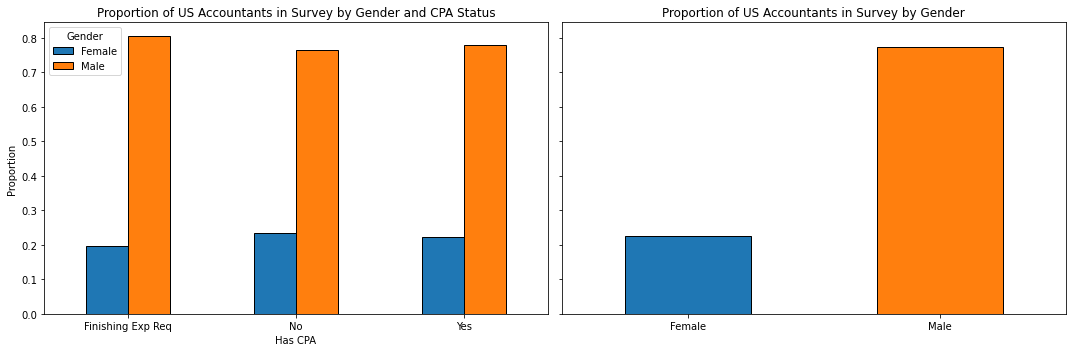

In [62]:
fig, ax = plt.subplots(1,2,sharey=True, figsize=(15,5))
cpa_gender_cross_tab = pd.crosstab(males_and_females['Has CPA'], males_and_females['Gender'], normalize='index')
cpa_gender_cross_tab.plot.bar(rot=0, edgecolor='black', ax=ax[0])
ax[0].set_ylabel('Proportion')
ax[0].set_title('Proportion of US Accountants in Survey by Gender and CPA Status')

males_and_females['Gender'].sort_values().value_counts(normalize=True, ascending=True).plot.bar(rot=0, ax=ax[1], color=gender_colors, edgecolor='black')
ax[1].set_title('Proportion of US Accountants in Survey by Gender')
plt.tight_layout()
plt.show()

If we drill down further by gender, the proportion of men to women who have their CPA seems to be the same in each of the three categories, hovering around 0.8 for men and 0.2 for women.  **These proportions are *very similar* to that of men to women in accounting in general and it doesn't seem as if men have an advantage when it comes to passing their CPA exams.**

### Has CPA by '`Line of Service'`

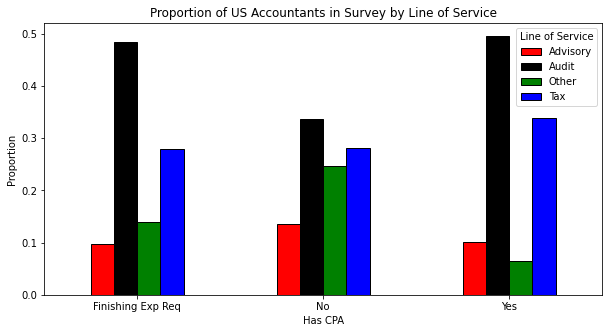

In [69]:
pd.crosstab(los_df_larger_30['Has CPA'], los_df_larger_30['Line of Service'], normalize='index').plot.bar(edgecolor='black', rot=0, figsize=(10,5), color=los_colors)
plt.ylabel('Proportion')
plt.title('Proportion of US Accountants in Survey by Line of Service')
plt.show()

Regardless of whether an accountant has their CPA, we see the greatest proportion of accountants being in either Audit or Tax for their line of service.  This could be because Audit and Tax are the two most common Lines of Service and we expect people in these Lines of Service to comprise a high proportion of the entire sample as a consequence.

Also, for accountants with their CPA, there is a fairly large difference in proportions between the Audit/Tax lines of service and Advisory/Other, and we see a greater concentration of accountants without their CPAs in the Advisory/Other categories.  Perhaps it is much more important to have your CPA when working in Audit/Tax, while there is lesser importance for the Advisory/Other fields, or perhaps accountants who either don't care about having a CPA, or have given up, are more likely to find their way into these fields.

### Has CPA by `'Current Salary + Bonus'` - Is getting the CPA worth it, will it help you achieve a higher salary?

Because we are interested in answering whether getting the CPA is worth it in regards to salary and bonuses, I'm going to exclude those who are still finishing their experience requirements and focus on only accountants that do or don't have their CPA.

In [70]:
yes_no_cpa_df = us_accounting[us_accounting['Has CPA'] != 'Finishing Exp Req']

#### Mean/Median Current Salary + Bonus

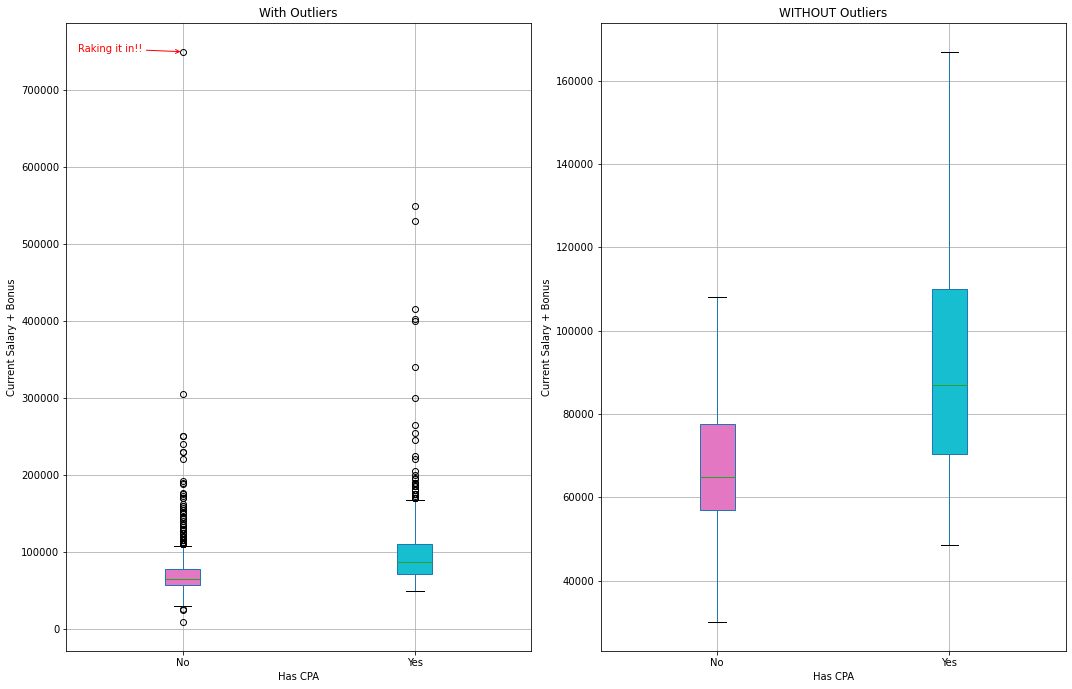

,count,mean,std,min,25%,50%,75%,max
Has CPA,,,,,,,,
No,565.0,75760.068142,43389.598448,8400.0,57000.0,65000.0,77500.0,750000.0
Yes,537.0,99027.290503,51101.860027,48500.0,70500.0,87000.0,110000.0,550000.0


In [71]:
fig, ax = plt.subplots(1,2, figsize=(15,10))
boxplot1 = yes_no_cpa_df.boxplot(column='Current Salary + Bonus', by='Has CPA', figsize=(5,10), ax=ax[0], patch_artist = True, return_type = 'both')
ax[0].set_title('With Outliers')
ax[0].set_ylabel('Current Salary + Bonus')
ax[0].annotate('Raking it in!!', xy=(1, 750_000), xytext=(0.55, 750_000), color='red', arrowprops={'arrowstyle':'->', 
                'connectionstyle':'arc3', 'color':'red'})

boxplot2 = yes_no_cpa_df.boxplot(column='Current Salary + Bonus', by='Has CPA', figsize=(5,10), ax=ax[1], patch_artist = True, return_type = 'both', showfliers=False)
ax[1].set_title('WITHOUT Outliers')
ax[1].set_ylabel('Current Salary + Bonus')
plt.tight_layout()
plt.suptitle(None)

for row_key, (ax, row) in boxplot1.iteritems():
    for i,box in enumerate(row['boxes']):
        box.set_facecolor(has_cpa_colors[i])

for row_key, (ax, row) in boxplot2.iteritems():
    for i,box in enumerate(row['boxes']):
        box.set_facecolor(has_cpa_colors[i])
        
plt.show()

yes_no_cpa_df.groupby('Has CPA')['Current Salary + Bonus'].describe()

* Looking at the boxplots without outliers, the range of salaries increases as one goes from not having their CPA, to having their CPA.  This would also be true when we include outliers, except for one accountant without their CPA who seems to be raking it in at 750,000 annually!  

* Regardless of whether outliers are present, we see an increase with the median Salary + Bonus as one goes from not having their CPA, to having their CPA.  

* In the descriptive statistics, we see the same pattern with mean Salary + Bonus. 

So far, this is looking as if having your CPA license will enable an accountant to earn more.

### Mean Salary by Line of Service by Has CPA - Do we see the same trend across Line of Service?

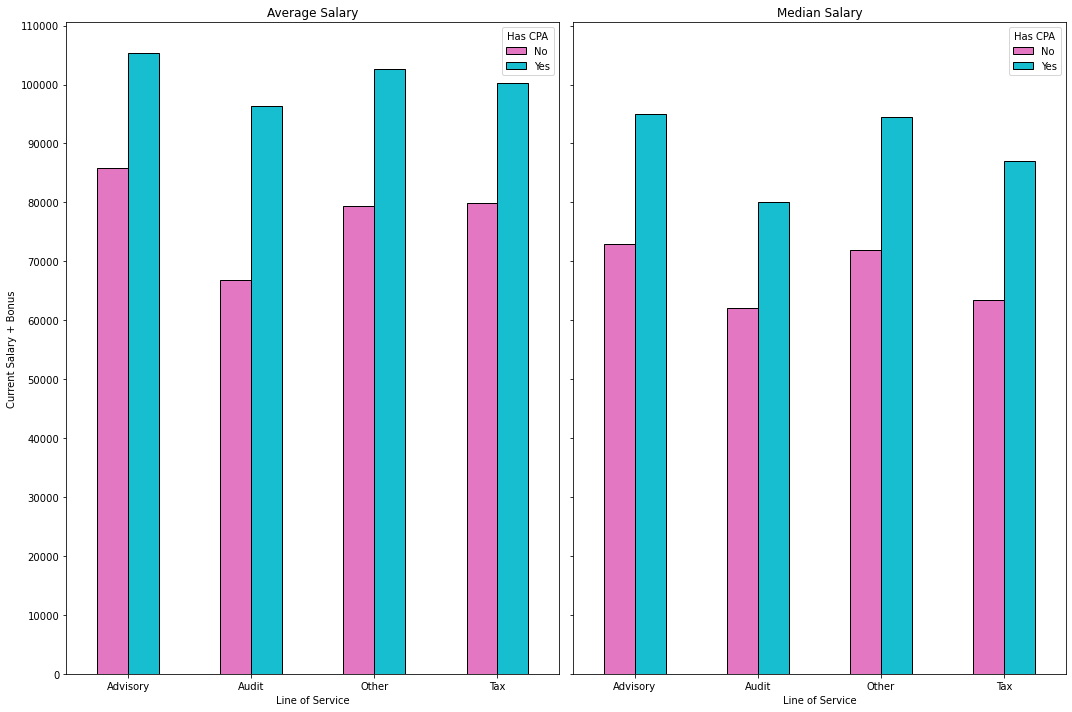

Mean Salary by Has CPA
Has CPA                    No            Yes  Salary Diff of means
Line of Service                                                   
Advisory         85844.756757  105276.226415          19431.469658
Audit            66796.502732   96352.279693          29555.776961
Other            79398.320896  102651.470588          23253.149693
Tax              79884.307190  100261.629213          20377.322024


Median Salary by Has CPA
Has CPA               No      Yes  Salary Diff of medians
Line of Service                                          
Advisory         73000.0  95000.0                 22000.0
Audit            62000.0  80000.0                 18000.0
Other            72000.0  94500.0                 22500.0
Tax              63500.0  87000.0                 23500.0


In [72]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(10,8))

mean_salary_by_los_and_cpa = los_df_larger_30[los_df_larger_30['Has CPA'] != 'Finishing Exp Req'].pivot_table(values='Current Salary + Bonus', columns='Has CPA', index='Line of Service', aggfunc='mean')
mean_salary_by_los_and_cpa['Salary Diff of means'] = mean_salary_by_los_and_cpa['Yes'] - mean_salary_by_los_and_cpa['No'] 

mean_salary_by_los_and_cpa.plot(y=['No', 'Yes'], kind='bar', figsize=(15,10), edgecolor='black', rot=0, ax=ax[0], color=has_cpa_colors)
ax[0].set_title('Average Salary')
ax[0].set_yticks(np.arange(0, 110_001, 10_000))
ax[0].set_ylabel('Current Salary + Bonus')
   
median_salary_by_los_and_cpa = los_df_larger_30[los_df_larger_30['Has CPA'] != 'Finishing Exp Req'].pivot_table(values='Current Salary + Bonus', columns='Has CPA', index='Line of Service', aggfunc='median')
median_salary_by_los_and_cpa['Salary Diff of medians'] = median_salary_by_los_and_cpa['Yes'] - median_salary_by_los_and_cpa['No'] 

median_salary_by_los_and_cpa.plot(y=['No', 'Yes'], kind='bar', figsize=(15,10), edgecolor='black', rot=0, ax=ax[1], color=has_cpa_colors)
ax[1].set_title('Median Salary')
ax[1].set_ylabel('Median Current Salary + Bonus')
   
plt.tight_layout()
plt.show()

print('Mean Salary by Has CPA')
print(mean_salary_by_los_and_cpa.to_string())
print()
print()
print('Median Salary by Has CPA')
print(median_salary_by_los_and_cpa.to_string())

For each of the 4 most common lines of service, the mean Salary + Bonus for accountants with their CPA is consistenly higher than for accountants who don't have their CPA.  The biggest difference occurrs in Audit, with a nearly 30,000 difference in annual salaries.

**Things to note:**
* **The mean and median salaries increase as one goes from not having their CPA, to having their CPA.**
* **The mean and median salaries show the same progression, for each of the 4 most common lines of service, and the annual pay jump in mean/median salary is sizeable (~20-30k) going from no CPA to having a CPA.**

### What can the distributions of Salary by Has CPA tell us?

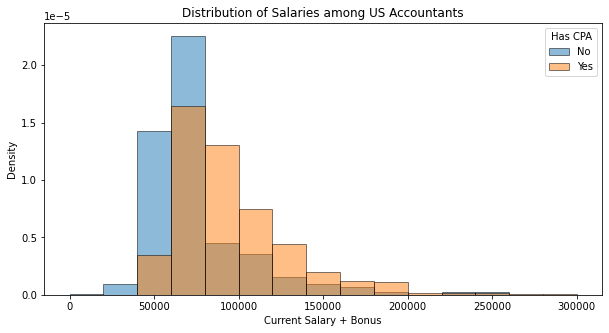

In [73]:
yes_no_cpa_df.groupby('Has CPA')['Current Salary + Bonus'].plot.hist(figsize=(10,5), bins=np.arange(0, 300_001, 20_000), alpha=0.5, edgecolor='black', density=True)
plt.xlabel('Current Salary + Bonus')
plt.ylabel('Density')
plt.title('Distribution of Salaries among US Accountants')
plt.legend(title='Has CPA')
plt.show()

There is a larger density of accountants who have their CPA in the high salary ranges and a larger density of accountants without their CPA in the lower salary ranges.  More evidence indicating that if an accountant has their CPA license, they'll earn more.

### Has CPA by `'Years Experience'` - Could these accountants be earning more simply because they have more experience?

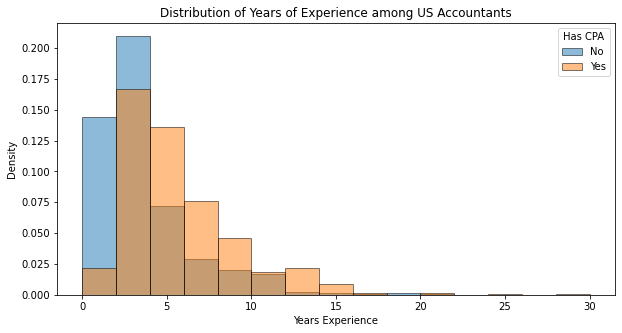

In [74]:
yes_no_cpa_df.groupby('Has CPA')['Years Experience'].plot.hist(figsize=(10,5), bins = np.arange(0, 31, 2), alpha=0.5, edgecolor='black', density=True)
plt.legend(title='Has CPA')
plt.xlabel('Years Experience')
plt.ylabel('Density')
plt.title('Distribution of Years of Experience among US Accountants')
plt.show()

In this distribution, we see a high density of accountants with their CPA as having more experience, which could also be contributing to the higher salaries we just observed.  More investigation would need to be done to determine the relationship among years experience, having the CPA license, and current salary + bonus.

### Has CPA by `'Gender'` - Do we see accountants with their CPA having higher pay for both genders?

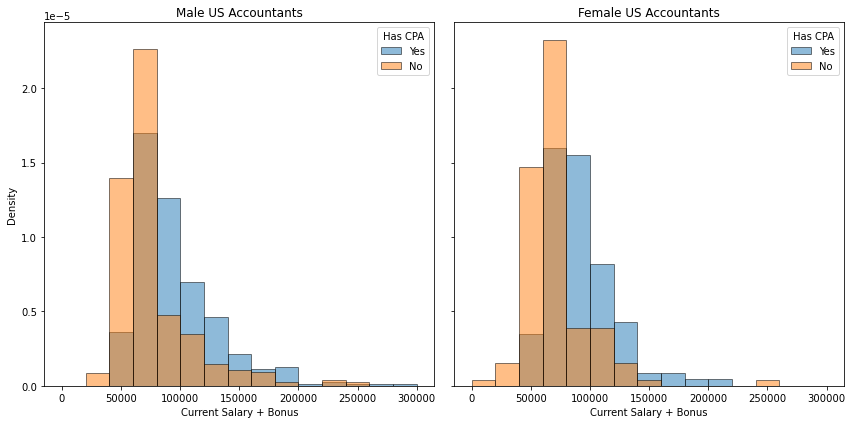

In [75]:
fig, ax = plt.subplots(1,2, figsize=(12,6), sharey=True)
cpa_and_gender_groups = yes_no_cpa_df.groupby(['Has CPA', 'Gender'])
cpa_and_gender_groups.get_group(('Yes', 'Male'))['Current Salary + Bonus'].hist(alpha=0.5, edgecolor='black', bins = np.arange(0, 300_001, 20_000), density=True, ax=ax[0], label='Yes')
cpa_and_gender_groups.get_group(('No', 'Male'))['Current Salary + Bonus'].hist(alpha=0.5, edgecolor='black', bins = np.arange(0, 300_001, 20_000), density=True, ax=ax[0], label='No')
ax[0].legend(title='Has CPA')
ax[0].set_xlabel('Current Salary + Bonus')
ax[0].set_ylabel('Density')
ax[0].grid(False)
ax[0].set_title('Male US Accountants')

cpa_and_gender_groups.get_group(('Yes', 'Female'))['Current Salary + Bonus'].hist(alpha=0.5, edgecolor='black', bins = np.arange(0, 300_001, 20_000), density=True, ax=ax[1], label='Yes')
cpa_and_gender_groups.get_group(('No', 'Female'))['Current Salary + Bonus'].hist(alpha=0.5, edgecolor='black', bins = np.arange(0, 300_001, 20_000), density=True, ax=ax[1], label='No')
ax[1].legend(title='Has CPA')
ax[1].set_xlabel('Current Salary + Bonus')
ax[1].grid(False)
ax[1].set_title('Female US Accountants')

#plt.suptitle('Salary + Bonus by Has CPA and Gender')
plt.tight_layout()
plt.show()

In each distribution, we see higher densities of accountants who have their CPA in with higher Salaries for both genders.

**To summarize: We see higher mean and median salaries for accountants who have their CPA, as well as a higher density of accountants with their CPA in the higher salary ranges, regardless of Gender or Line of Service.  There is compelling evidence that having your CPA license will likely yield a higher annual salary.**

# Exploring by `Exit Status`

In the accounting world, there are two domains: public accounting and corporate/private accounting.  In this section, I plan to see if working for a public accounting firm before transitioning to work as an accountant for a private firm has an impact on one's salary as compared to accountants who started their careers in corporate firms and have never worked at a public firm.

In [76]:
unique_exit_status = us_accounting['Exit Status'].unique()
unique_exit_status_length = len(unique_exit_status)
print('Exit Status has the following ' + str(unique_exit_status_length) + ' categories:')
print()
i=1
for status in unique_exit_status:
    print(str(i) + '. ' + status)
    i+=1
#print(us_accounting['Exit Status'].unique())

Exit Status has the following 6 categories:

1. I am currently working at a Big 4 accounting firm
2. I am currently working at a mid-tier or local accounting firm
3. I have never worked at a public accounting firm
4. I am still in school
5. I have already exited from a Big 4 Accounting firm
6. I have already exited from a mid-tier or local accounting firm


Because of the comparison we are trying to make, we'll want to focus solely on those who have never worked in a public accounting firm, versus those who did, then left for the private sector. This means we'll focus on the following three categories: 
1. I have never worked at a public accounting firm
2. I have already exited from a Big 4 Accounting firm
3. I have already exited from a mid-tier or local accounting firm

We'll start by creating a new dataframe that contains only these exit statuses and distill them down into just two categories:

1. Never been in a public accounting firm
2. Already exited a public accounting firm

In [77]:
def get_exit_status(x, status_list):
    if x == status_list[0]:
        return 'never_public'
    else:
        return 'exited_public'
    
exit_stats_of_interest = ['I have never worked at a public accounting firm', 'I have already exited from a Big 4 Accounting firm', 'I have already exited from a mid-tier or local accounting firm']

df_exit_stats_of_interest = us_accounting[us_accounting['Exit Status'].isin(exit_stats_of_interest)].copy(deep=True)

df_exit_stats_of_interest['Public?'] = df_exit_stats_of_interest['Exit Status'].apply(get_exit_status, args=[exit_stats_of_interest])

exit_stats_of_interest_groups = df_exit_stats_of_interest.groupby('Public?')

### What private industries do accountants who have exited a public accounting firm work at versus what private industries do accountants who have never worked in public accounting work at?

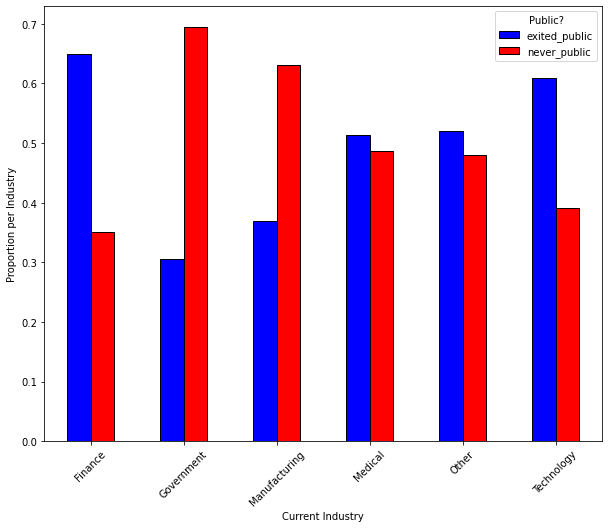

In [78]:
exit_stats_colors = ['blue', 'red']

pd.crosstab(df_exit_stats_of_interest.groupby('Current Industry').filter(lambda x: len(x)>=30)['Current Industry'], df_exit_stats_of_interest.groupby('Current Industry').filter(lambda x: len(x)>=30)['Public?'], normalize='index').plot.bar(edgecolor='black', rot=45, figsize=(10,8), color=exit_stats_colors)
plt.ylabel('Proportion per Industry')
plt.show()

* **Finance and technology have the greatest proportions of accountants who first worked in a public accounting firm.**
* **Government and Manufacturing have the greatest proportion of accountants who never worked in a public accounting firm.**

## Do those who have worked in a public accounting firm and then exited to private firms make more than those who are currently in private firms and have never worked in public accounting?


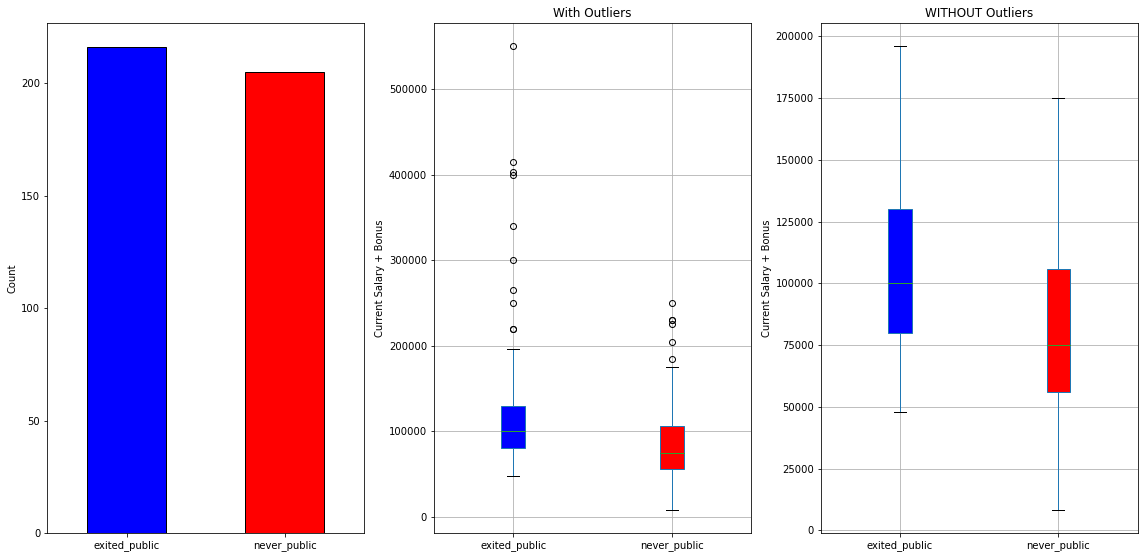


               count           mean           std      min      25%       50%       75%       max
Public?                                                                                          
exited_public  216.0  114857.027778  62966.072933  48000.0  80000.0  100000.0  130000.0  550000.0
never_public   205.0   85402.768293  39039.502736   8400.0  56000.0   75000.0  106000.0  250000.0



In [79]:

fig = plt.figure(figsize=(16,8))
gs = GridSpec(1,3, figure=fig)

ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[0,2])

df_exit_stats_of_interest['Public?'].value_counts().plot.bar(ax=ax1, rot=0, edgecolor='black', color=exit_stats_colors)
ax1.set_ylabel('Count')

boxplot1 = df_exit_stats_of_interest.boxplot(column='Current Salary + Bonus', by='Public?', figsize=(8,8), ax=ax2, patch_artist=True, return_type='both')
ax2.set_title('With Outliers')
ax2.set_xlabel(None)
ax2.set_ylabel('Current Salary + Bonus')

boxplot2 = df_exit_stats_of_interest.boxplot(column='Current Salary + Bonus', by='Public?', figsize=(8,8), ax=ax3, patch_artist=True, return_type='both', showfliers=False)
ax3.set_title('WITHOUT Outliers')
ax3.set_xlabel(None)
ax3.set_ylabel('Current Salary + Bonus')

for row_key, (ax, row) in boxplot1.iteritems():
    for i,box in enumerate(row['boxes']):
        box.set_facecolor(exit_stats_colors[i])

for row_key, (ax, row) in boxplot2.iteritems():
    for i,box in enumerate(row['boxes']):
        box.set_facecolor(exit_stats_colors[i])
        
        
plt.suptitle(None)
plt.tight_layout()
plt.show()
print()
print(exit_stats_of_interest_groups['Current Salary + Bonus'].describe().to_string())
print()

* With outliers, the boxplots and descriptive statistics indicate the range of salaries for those who exited a public firm to go into a private one is wider and extends much higher than for those who went straight into private accounting.  Furthermore, every quartile is higher. 

* Without outliers, the range of salaries for those who never went into public accounting is slightly wider, however this is only because it has more salaries packed in the lower end.  We still see every quartile being higher for accountants who exited a public firm. 

We should do some more investigation, but so far this is starting to indicate one may expect to earn more if they start at a public accounting firm and then transition into an accounting role at a private company.

### What do the distribution of salaries tell us?

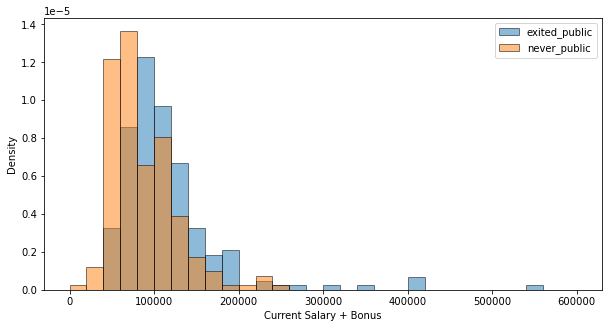

In [80]:
exit_stats_of_interest_groups['Current Salary + Bonus'].plot.hist(figsize=(10,5), bins = np.arange(0, 600_001, 20_000), edgecolor='black', alpha=0.5, density=True)
plt.legend()
plt.xlabel('Current Salary + Bonus')
plt.ylabel('Density')
plt.show()

The histogram above shows there are high densitites of accountants who have exited a public firm earning higher salaries than those who went directly to the private sector, in fact many of our outlier accountants fall in this category, while there are high densities of accountants earning who have never worked in a public firm earning lower salaries. 

**Conclusion: All evidence so far indicates that working for a public firm first will reap financial benefits.** 

For now, I'm going to stop investgating this field, but it might be worthwhile to perform a hypothesis test and see if these observed differences could be caused by random chance.

## Exploring by `Current Industry`

For this analysis, I'll again only choose industries based on a cutoff where the industry has a sample size of 30 or more.  The relevant industries appear to be:
1. Public Accounting
2. Other
3. Finance
4. Technology
5. Manufacturing
6. Medical
7. Government

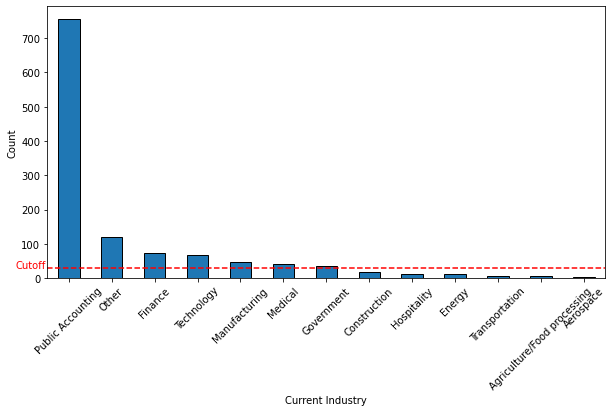

In [86]:
bar = us_accounting['Current Industry'].value_counts().plot.bar(figsize=(10,5), rot=45, edgecolor='black')
bar.axhline(30, color='red', linestyle='--')
bar.text(-1.25, 30, 'Cutoff', color='red', ha='left')
bar.set_xlabel('Current Industry')
bar.set_ylabel('Count')
plt.show()

### Gender by `Current Industry`

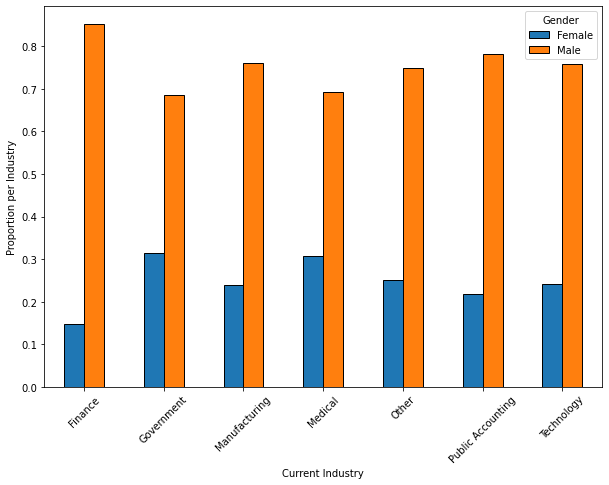

In [87]:
#Let's create a new dataframe that only contains these industries and then use it for our analysis
industry_df_greater_30 = us_accounting.groupby('Current Industry').filter(lambda x: len(x) >= 30)

pd.crosstab(industry_df_greater_30[industry_df_greater_30['Gender']!='Undisclosed']['Current Industry'], industry_df_greater_30[industry_df_greater_30['Gender']!='Undisclosed']['Gender'], normalize='index').plot.bar(edgecolor='black', rot=45, figsize=(10,7))
plt.ylabel('Proportion per Industry')
plt.show()

Accounting appears to be very male dominated.  For each of the 7 most populated industries, the proportion of male accountants is two to three times as many, or more, as compared with female accountants.  The disparity appears to be most significant in Finance, with roughly 6-7 times as many male accountants as female ones.

### Mean/Median Salary by Industry - Does a certain industry earn more?

In [88]:
mean_median_by_industry = industry_df_greater_30.groupby('Current Industry').agg(['mean','median'])

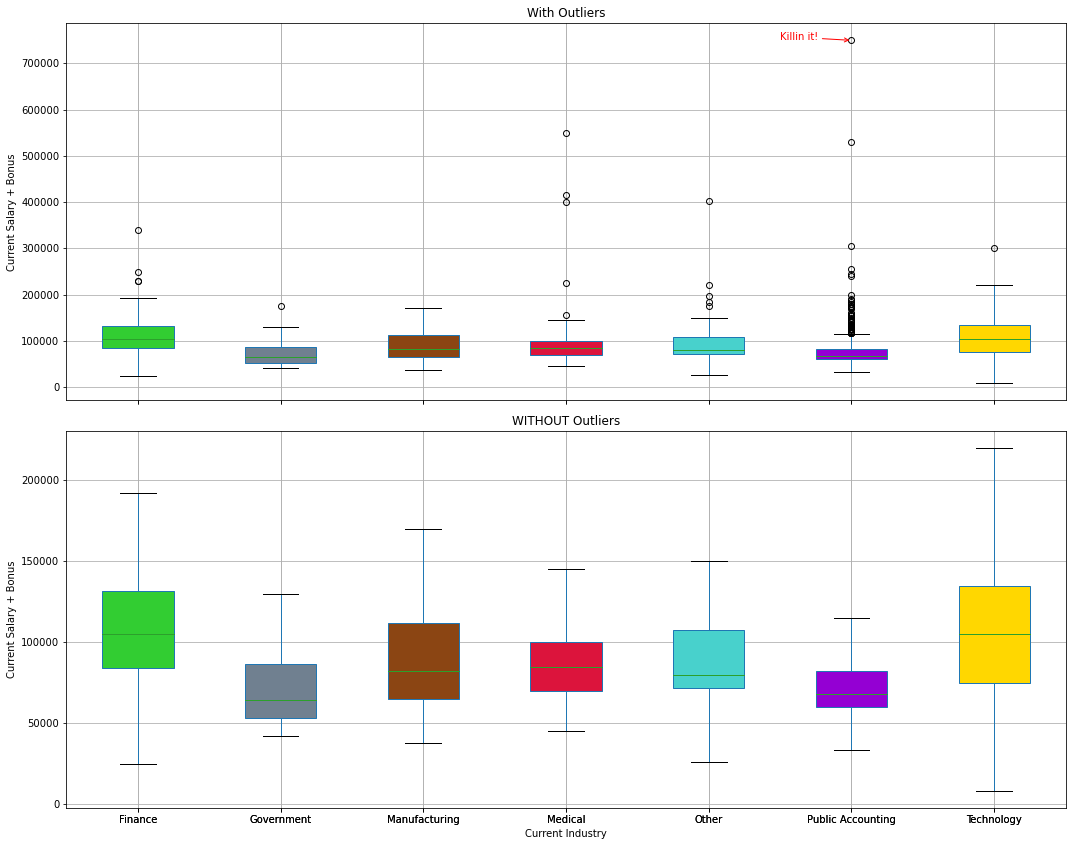

In [89]:
industry_clrs_dict = {'Finance':'limegreen', 'Government':'slategrey', 'Manufacturing':'saddlebrown', 'Medical':'crimson', 'Other':'mediumturquoise', 'Public Accounting':'darkviolet', 'Technology':'gold'}

fig, ax = plt.subplots(2,1, figsize=(15,12), sharex=True)

boxes1 = industry_df_greater_30.boxplot(column='Current Salary + Bonus', by='Current Industry', return_type='both', patch_artist=True, ax=ax[0])
ax[0].set_title('With Outliers')
ax[0].set_ylabel('Current Salary + Bonus')
ax[0].set_xlabel(None)
ax[0].annotate('Killin it!', xy=(6, 750_000), xytext=(5.5, 750_000), color='red', arrowprops={'arrowstyle':'->', 'color':'red'})

boxes2 = industry_df_greater_30.boxplot(column='Current Salary + Bonus', by='Current Industry', return_type='both', patch_artist=True, ax=ax[1], showfliers=False)
ax[1].set_ylabel('Current Salary + Bonus')
ax[1].set_title('WITHOUT Outliers')

color_list = []
for label in ax[1].get_xticklabels():
    industry = label.get_text()
    if industry=='':
        break
    else:
        color = industry_clrs_dict[industry]
        color_list.append(color)

for row_key, (ax, row) in boxes1.iteritems():
    for i,box in enumerate(row['boxes']):
        box.set_facecolor(color_list[i])

for row_key, (ax, row) in boxes2.iteritems():
    for i,box in enumerate(row['boxes']):
        box.set_facecolor(color_list[i])

fig.suptitle(None)

plt.tight_layout()
plt.show()

**WITHOUT Outliers:**
* Technology and Finance have the widest range of salaries and the two maximum salaries.
* Government and Public accounting have the narrowest range of salaries.

**With Outliers:**
* Government, Manufacturing, and Technology have the least salaries considered to be outliers, with Manufacturing having no outliers at all.
* Public Accounting has the largest range of salaries because of one outlier salary, the same guy we saw earlier in our analysis, who is making 750,000 annually!  Otherwise, Medical would have the greatest range.

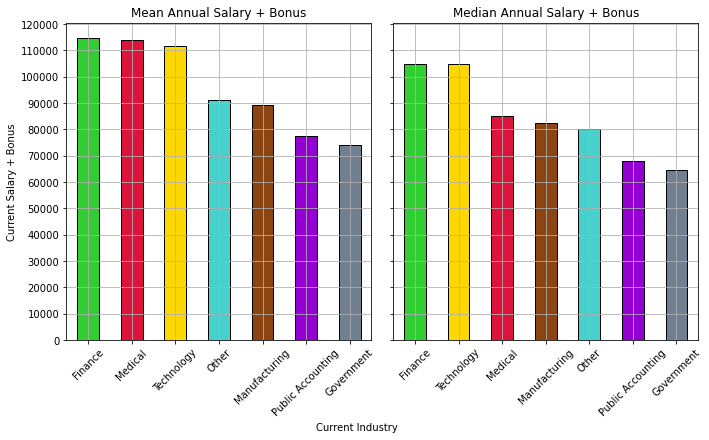

In [90]:

fig, ax = plt.subplots(1,2, sharey=True, figsize=(10,6))

mean_color_list = []
for industry in mean_median_by_industry['Current Salary + Bonus', 'mean'].sort_values(ascending=False).index:
    mean_color_list.append(industry_clrs_dict[industry])
    
mean_median_by_industry['Current Salary + Bonus', 'mean'].sort_values(ascending=False).plot.bar(ax=ax[0], rot=45, color=mean_color_list, edgecolor='black')
ax[0].set_ylabel('Current Salary + Bonus')
ax[0].set_title('Mean Annual Salary + Bonus')
ax[0].grid()
ax[0].set_yticks(np.arange(0, 120_001, 10_000))
ax[0].set_xlabel(None)

median_color_list = []
for industry in mean_median_by_industry['Current Salary + Bonus', 'median'].sort_values(ascending=False).index:
    median_color_list.append(industry_clrs_dict[industry])


mean_median_by_industry['Current Salary + Bonus', 'median'].sort_values(ascending=False).plot.bar(ax=ax[1], rot=45, color=median_color_list, edgecolor='black')
ax[1].set_title('Median Annual Salary + Bonus')
ax[1].grid()
ax[1].set_xlabel(None)

fig.text(0.5, 0, 'Current Industry', ha='center', va='center')
plt.tight_layout()
plt.show()

* **Technology, Medical, and Finance rank among the top 3 for both Mean and Median Annual Salary + Bonus.**
* **Public Accounting and Government are at the bottom for both Mean and Median Annual Salary.**
  * The results for Public Accounting should make sense as accountants typically get their start at a public firm, then move into other industries, which would mean that while working at a public firm, they'd tend to be at the start of their career and have lower salaries.
  

Let's see what years experience looks like among these industries

### Could the Technology, Medical, and Finance industries earn more because they have more experience?

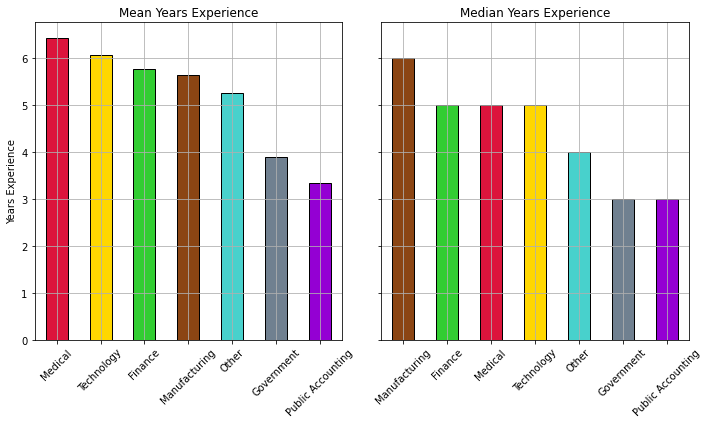

In [92]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(10,6))

mean_color_list=[]
for industry in mean_median_by_industry['Years Experience', 'mean'].sort_values(ascending=False).index:
    mean_color_list.append(industry_clrs_dict[industry])
mean_median_by_industry['Years Experience', 'mean'].sort_values(ascending=False).plot.bar(ax=ax[0], rot=45, edgecolor='black', color=mean_color_list)
ax[0].set_title('Mean Years Experience')
ax[0].set_xlabel(None)
ax[0].set_ylabel('Years Experience')
ax[0].grid()

median_color_list = []
for industry in mean_median_by_industry['Years Experience', 'median'].sort_values(ascending=False).index:
    median_color_list.append(industry_clrs_dict[industry])
mean_median_by_industry['Years Experience', 'median'].sort_values(ascending=False).plot.bar(ax=ax[1], rot=45, edgecolor='black', color=median_color_list)
ax[1].set_title('Median Years Experience')
ax[1].set_xlabel(None)
ax[1].grid()
#industry_df_greater_30.groupby('Current Industry').agg(['mean', 'median'])['Years Experience'].plot.bar()

plt.tight_layout()
plt.show()

* **Accountants in the Medical and Technology industries are in the top 3 for highest Mean and Median years experience.**
    * This could explain in part why we saw high mean/median salaries in these industries.
* **Accountants in Government and Public Accounting have the lowest Mean and Median Years Experience.**
    * This could explain in part why we saw low mean/medial salaries in these industries.

## Could the Technology, Medical, and Finance industries earn more because they have more licensed CPAs?

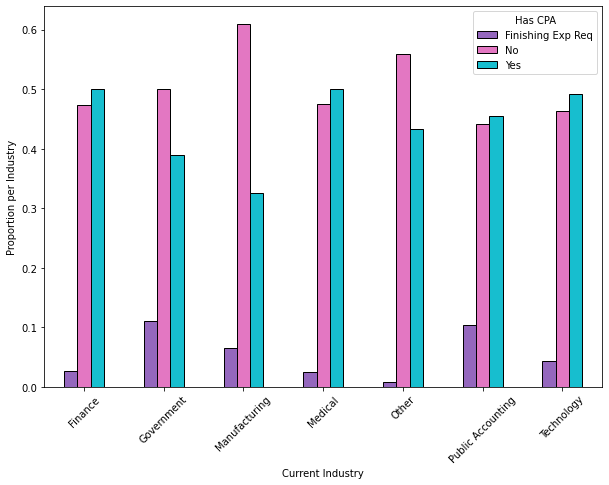

In [95]:
has_cpa_color_dict = {'No':'tab:pink', 'Yes':'tab:cyan', 'Finishing Exp Req':'tab:purple'}

pd.crosstab(industry_df_greater_30['Current Industry'], industry_df_greater_30['Has CPA'], normalize='index').plot.bar(edgecolor='black', rot=45, figsize=(10,7), color=has_cpa_color_dict)
plt.ylabel('Proportion per Industry')
plt.show()

Finance, Medical, and Technology have the highest proportion of accountants with their CPA and these three industries held the top 3 spots for both mean and median salary.

**Conclusion: The Finance, Technology, and Medical industries seem to be the best industries to get in as they have higher mean and median salaries, as well as wider salary ranges.  This could be related to those industries also having the highest proportions of accountants with their CPA, or it could be related to accountants in those fields having more experience.  More investigation is needed to further investigate these relationships.**

## Revisiting our quantitative data again

### Exploring `Years Experience` by `'Current Salary + Bonus'`

Earlier, we saw that the accountants in the survey that were considered outliers based on their salary tended to have more experience than the other accountants.  We also saw that those who have their CPA tend to earn more and those with their CPA tend to have more experience.  Even without these previous observations, it's reasonable to expect some relationship between one's salary and years experience.  Let's investigate this relationship.

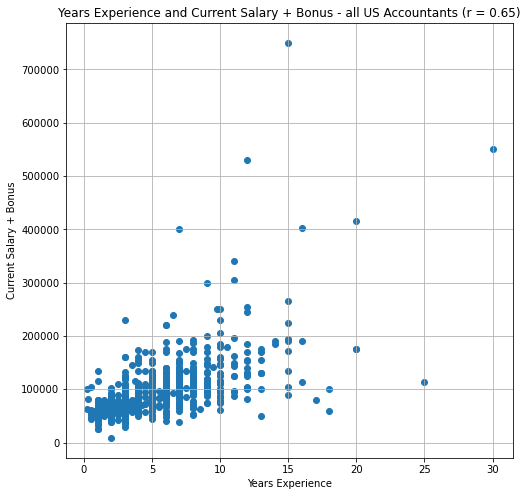

In [97]:
yrs_exp_and_salary = us_accounting[['Years Experience', 'Current Salary + Bonus']]
yrs_exp_and_salary_corr = yrs_exp_and_salary.corr().iloc[0,1]

plt.figure(figsize=(8,8))
plt.scatter(yrs_exp_and_salary['Years Experience'], yrs_exp_and_salary['Current Salary + Bonus'])
plt.title('Years Experience and Current Salary + Bonus - all US Accountants (r = {:.2f})'.format(yrs_exp_and_salary_corr))
plt.xlabel('Years Experience')
plt.ylabel('Current Salary + Bonus')
plt.grid();

As we expected, there is a positive relationship between Years Experience and Current Salary + Bonus.  With a correlation coefficient of 0.65, this is a fairly strong correlation.  Do we see a similar trend when comparing those who have their CPA against those who don't?

### Salary and Years Experience by Has CPA

We noticed that accountants who had their CPA license tended to earn more than accountans who didn't.  Let's investigate this again with a scatter plot.

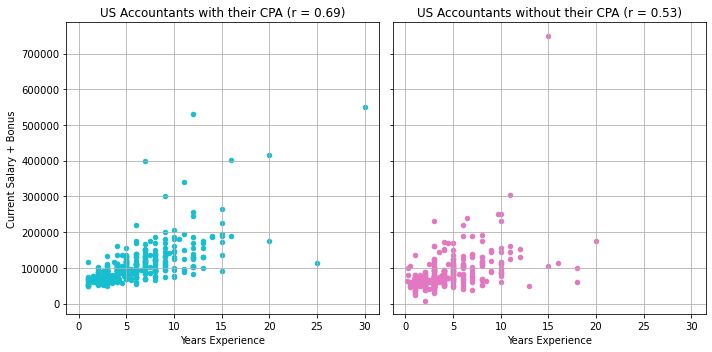

In [98]:
cpa_group_df = yes_no_cpa_df.groupby('Has CPA')

cpa_yes_cor = cpa_group_df.get_group('Yes').corr().iloc[0,1]
cpa_no_cor = cpa_group_df.get_group('No').corr().iloc[0,1]

fig, ax = plt.subplots(1,2, figsize=(10,5), sharex=True, sharey=True)
cpa_group_df.get_group('Yes').plot.scatter('Years Experience', 'Current Salary + Bonus', ax=ax[0], color=has_cpa_colors[1])
ax[0].grid()
ax[0].set_title('US Accountants with their CPA (r = {:.2f})'.format(cpa_yes_cor))

cpa_group_df.get_group('No').plot.scatter('Years Experience', 'Current Salary + Bonus', ax=ax[1], color=has_cpa_colors[0])
ax[1].grid()
ax[1].set_title('US Accountants without their CPA (r = {:.2f})'.format(cpa_no_cor))


plt.tight_layout()
plt.show()

There is a positive correlation between Years Experience and Current Salary + Bonus regardless of whether one has their CPA or not, however the correlation coefficient is a fair bit stronger for those who have their CPA, as can be seen in the title of the scatterplot above.  This means that an accountant with their CPA will see larger salary increases per year of experience gained, which could be the results of them having their CPA, and lends further evidence that getting your CPA leads to a higher salary, especially over longer careers.  

### Salary and Years Experience by Gender
We noticed that men tended to earn more than women, let's investigate this again with a scatter plot.

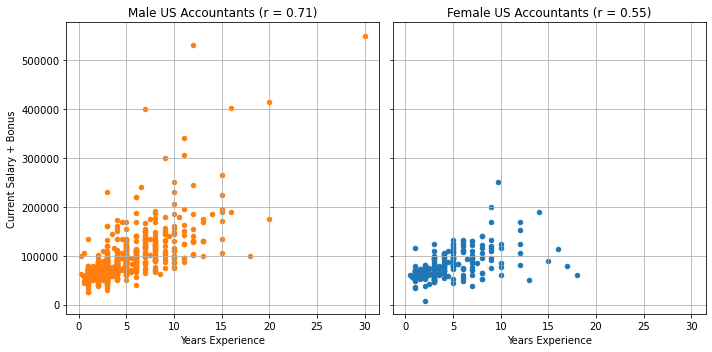

In [99]:
men = m_f_groups.get_group('Male')
women = m_f_groups.get_group('Female')

male_corr = men.corr().iloc[0,1]
female_corr = women.corr().iloc[0,1]

fig, ax = plt.subplots(1, 2, figsize=(10,5), sharex=True, sharey=True)
men.plot.scatter('Years Experience', 'Current Salary + Bonus', ax=ax[0], color=gender_colors[1])
ax[0].grid()
ax[0].set_title('Male US Accountants (r = {:.2f})'.format(male_corr))

women.plot.scatter('Years Experience', 'Current Salary + Bonus', ax=ax[1], color=gender_colors[0])
ax[1].grid()
ax[1].set_title('Female US Accountants (r = {:.2f})'.format(female_corr))

plt.tight_layout()
plt.show()

We continue to see a positive correlation between Years Experience and Current Salary + Bonus regardless of gender although a higher significance for male accountants.  This means that male accountants see larger salary increases for each year of experience gained as compared to female accountants.  If this difference is truly caused by gender, it would be strong evidence that a pay gap exists and would get more pronounced over longer careers.

### Salary and Years Experience by Line of Service

Earlier, we noticed small differences in salary based on an accountants Line of Service, but nothing too significant.  Will a scatter plot shed any new light on the subject?

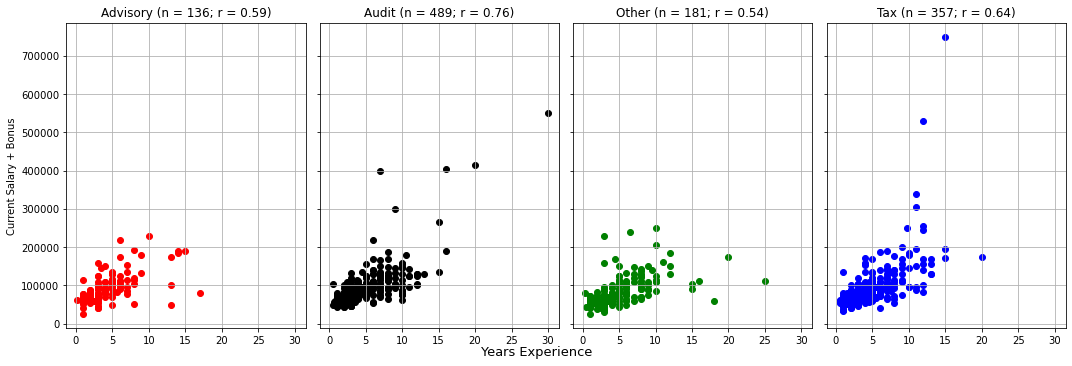

In [100]:
los_groups = us_accounting.groupby('Line of Service')

num_groups = len(list(los_groups.groups.keys()))
fig, ax = plt.subplots(1, 4, figsize=(15,5), sharex = True, sharey=True)
i=0
for name,group in los_groups:
    sample_size = len(los_groups.get_group(name))
    if sample_size >= 30:
        yrs_exp_salary_corr = los_groups.get_group(name).corr().iloc[0,1]
        ax[i].scatter(group['Years Experience'], group['Current Salary + Bonus'], label=name, color=los_colors[i])
        ax[i].set_title(name + ' (n = {}; r = {:.2f})'.format(sample_size, yrs_exp_salary_corr))
        ax[i].grid()
        #quantile = group['Current Salary + Bonus'].quantile(0.9)
        #ax[i].axhline(quantile, color='red')
        i+=1
ax[0].set_ylabel('Current Salary + Bonus')
#fig.text(0.5, 0.998, 'Non-normalized', ha='center', va='center', fontsize=15)
fig.text(0.5, 0.01, 'Years Experience', ha='center', va='center', fontsize=13)
plt.tight_layout()


We see a positive association across all lines of service as well, with Audit and Tax showing the highest linear correlation, however these lines of service have the most outliers and the correlation coefficient will be affected as a result.  Let's see what happens if we remove salaries that are considered outliers using our $\pm2\sigma$ rule from earlier.

#### Salary and Years Experience by Line of Service - WITHOUT Outliers

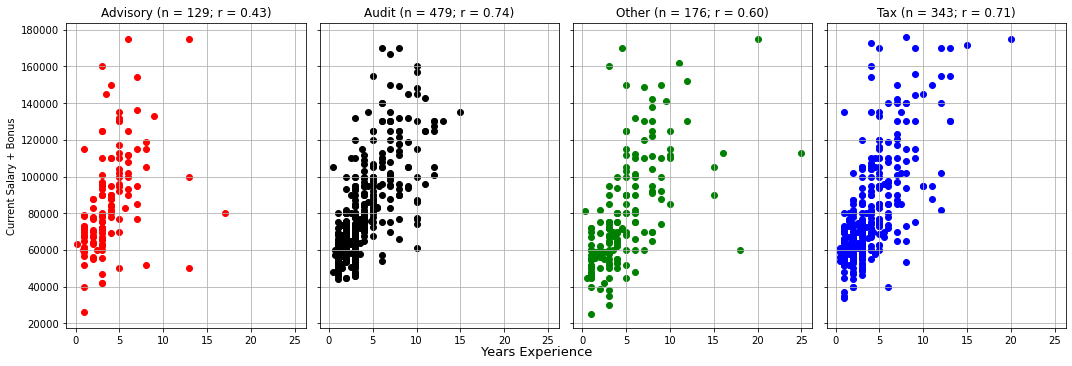

In [101]:
los_groups_without_outliers = salaries_without_outliers.groupby('Line of Service')

num_groups = len(list(los_groups_without_outliers.groups.keys()))
fig, ax = plt.subplots(1, 4, figsize=(15,5), sharex = True, sharey=True)
i=0
for name,group in los_groups_without_outliers:
    sample_size = len(los_groups_without_outliers.get_group(name))
    if sample_size >= 30:
        yrs_exp_salary_corr = los_groups_without_outliers.get_group(name).corr().iloc[0,1]
        ax[i].scatter(group['Years Experience'], group['Current Salary + Bonus'], label=name, color=los_colors[i])
        ax[i].set_title(name + ' (n = {}; r = {:.2f})'.format(sample_size, yrs_exp_salary_corr))
        ax[i].grid()
        #quantile = group['Current Salary + Bonus'].quantile(0.9)
        #ax[i].axhline(quantile, color='red')
        i+=1
ax[0].set_ylabel('Current Salary + Bonus')
#fig.text(0.5, 0.998, 'Non-normalized', ha='center', va='center', fontsize=15)
fig.text(0.5, 0.01, 'Years Experience', ha='center', va='center', fontsize=13)
plt.tight_layout()


Interestingly enough, we still see the highest correlation coefficient in Audit and then in Tax at 0.74 and 0.71 respectively.

Furthermore, we saw previously that Advisory had the highest mean and median salary, however that line of service has the lowest correlation between years experience and salary.

Overall, whether one includes outliers or not, it's still unclear if one line of service earns more than another.

### Salary and Years Experience by Exit Status
There was some evidence from earlier that lead us to believe accountants may earn more if they worked at a public accounting firm first, then exited to the private sector.  Can scatter plots shed any new light here?

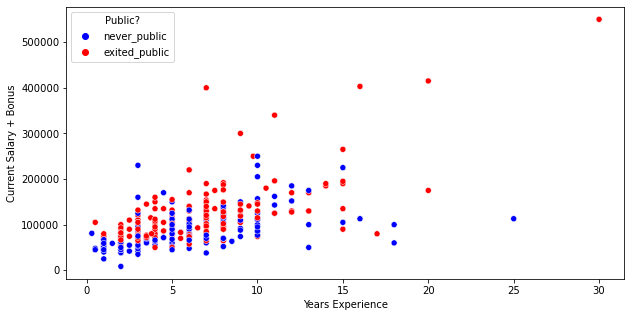

In [102]:
fig, ax = plt.subplots(figsize=(10,5))

sns.scatterplot(data=df_exit_stats_of_interest, x='Years Experience', y='Current Salary + Bonus', hue='Public?', palette=exit_stats_colors, ax=ax)

plt.show()

The scatterplot appears to show that accountants who have exited a public firm and transitioned to a private firm tend to have higher salaries at various different years of experience.  Let's investigate further and look at each type of accountants  side by side.

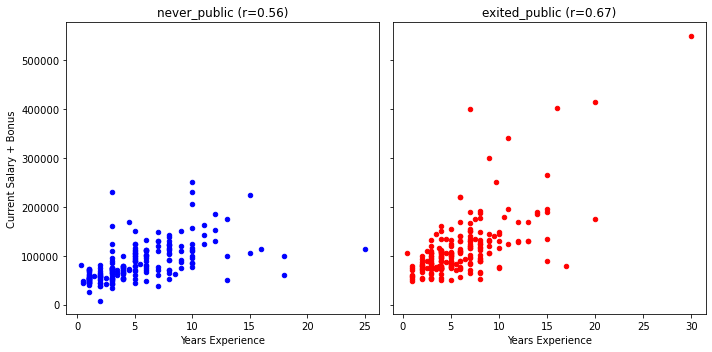

In [103]:
exit_stats_yrs_exp_and_salary = df_exit_stats_of_interest[['Years Experience', 'Current Salary + Bonus', 'Public?']]

never_public_yrs_exp_and_salary_corr = exit_stats_yrs_exp_and_salary[exit_stats_yrs_exp_and_salary['Public?']=='never_public'].corr().iloc[0,1]

exited_public_yrs_exp_and_salary_corr = exit_stats_yrs_exp_and_salary[exit_stats_yrs_exp_and_salary['Public?']=='exited_public'].corr().iloc[0,1]

fig, ax = plt.subplots(1, 2, figsize=(10,5), sharey=True)

df_exit_stats_of_interest[df_exit_stats_of_interest['Public?']=='never_public'].plot.scatter(x='Years Experience', y='Current Salary + Bonus', color=exit_stats_colors[0], ax=ax[0])
ax[0].set_title('never_public (r={:.2f})'.format(never_public_yrs_exp_and_salary_corr))

df_exit_stats_of_interest[df_exit_stats_of_interest['Public?']=='exited_public'].plot.scatter(x='Years Experience', y='Current Salary + Bonus', color=exit_stats_colors[1], ax=ax[1])
ax[1].set_title('exited_public (r={:.2f})'.format(exited_public_yrs_exp_and_salary_corr))

plt.tight_layout()
plt.show()

In both cases we see a positive linear relationship, however the correlation between years experience and salary is higher for those who exited a public firm.  This means that those accountants see larger salary increases per year of experience gained, which could be evidence that those accountants also end up earning more in the long run.

**Conclusion:**

* **All scatterplots between `Years Experience` and `Current Salary + Bonus` reveal a positive relationship, which is to be expected, as one generally sees an increase in pay as one gains more experience.**
  * We see this relationship for all lines of service, regardless of whether one has their CPA, and for both genders.  
* **In many cases, we continue to observe sizeable differences in correlation coefficients between genders, between accountants who do or don't have their cpa, and between accountants who have exited a public firm versus those who never worked in a public firm.** 
  * This could be additional evidence of a pay gap between genders, between those who have their CPA license and those who don't, as well as whether one worked at a public accounting firm or not.


# For later?

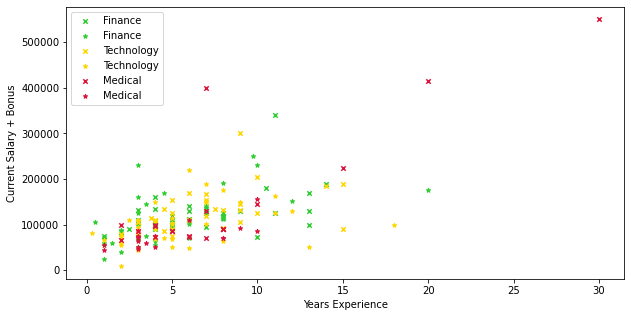

In [104]:
current_industries = industry_df_greater_30['Current Industry'].unique()
cpa_markers = ['x', '*']

fig, ax = plt.subplots(1,1, figsize=(10,5))

for industry in ['Finance', 'Technology', 'Medical']:
    industry_df_greater_30[(industry_df_greater_30['Current Industry']==industry) & (industry_df_greater_30['Has CPA']=='Yes')].plot.scatter(x='Years Experience', y='Current Salary + Bonus', c=industry_clrs_dict[industry], label=industry, ax = ax, marker='x')
    
    industry_df_greater_30[(industry_df_greater_30['Current Industry']==industry) & (industry_df_greater_30['Has CPA']=='No')].plot.scatter(x='Years Experience', y='Current Salary + Bonus', c=industry_clrs_dict[industry], label=industry, ax = ax, marker='*')
plt.legend()
plt.show();

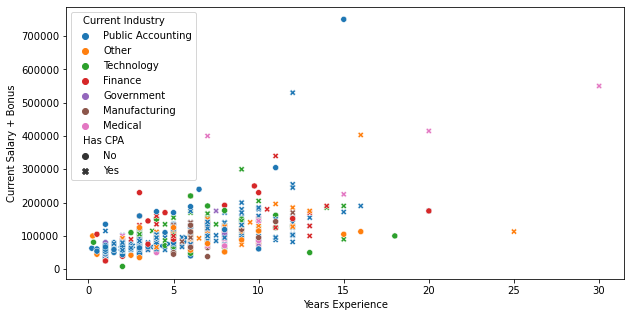

In [105]:
fig, ax = plt.subplots(1,1, figsize=(10,5))

top3_industries = industry_df_greater_30[industry_df_greater_30['Current Industry'] == 'Finance']
sns.scatterplot(data=industry_df_greater_30[industry_df_greater_30['Has CPA']!='Finishing Exp Req'], x='Years Experience', y='Current Salary + Bonus', hue='Current Industry', style='Has CPA', ax=ax)

plt.show()

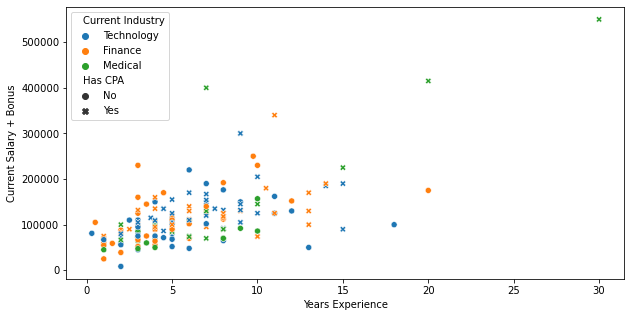

In [106]:
yes_no_industry = industry_df_greater_30[industry_df_greater_30['Has CPA']!='Finishing Exp Req']
top3_industries = yes_no_industry[yes_no_industry['Current Industry'].isin(['Finance', 'Technology', 'Medical'])]

fig, ax = plt.subplots(figsize=(10,5))
sns.scatterplot(data=top3_industries, x = 'Years Experience', y='Current Salary + Bonus', hue='Current Industry', style='Has CPA', ax=ax)

plt.show()